# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import reduce
import matplotlib
from past.builtins import xrange
from textwrap import wrap
from matplotlib import cm
import random
import matplotlib.colors as mcolors
import seaborn as sns
import pickle

In [2]:
prefix   = 'E:/ML Fire/EPRI-Data/EPRI_OG/EPRI-FEDB_DA/'
plot     = 'Plots/'
old      = 'Old/'
updated_data = 'Updated Data/'
up_data_plot =  'Updated Data/Plots/'
sys_plot = os.path.join(prefix, plot)
sys_old  = os.path.join(prefix, old)
sys_up_data = os.path.join(prefix, updated_data)
sys_up_dplo = os.path.join(prefix, up_data_plot)

# Import EPRI data

**Import the EPRI updated Data**

In [3]:
EPRI_up = pd.read_excel(sys_up_data + 'EPRI_1990-2014.xlsx')

**Import Combustible Group Types in challenging Fire Events**

In [4]:
liq_et    = pd.read_pickle(sys_up_data + 'liq_et')
trans_et  = pd.read_pickle(sys_up_data + 'trans_et')
gas_et    = pd.read_pickle(sys_up_data + 'gas_et')
ins_et    = pd.read_pickle(sys_up_data + 'ins_et')
insitu_et = pd.read_pickle(sys_up_data + 'insitu_et')

# Plots

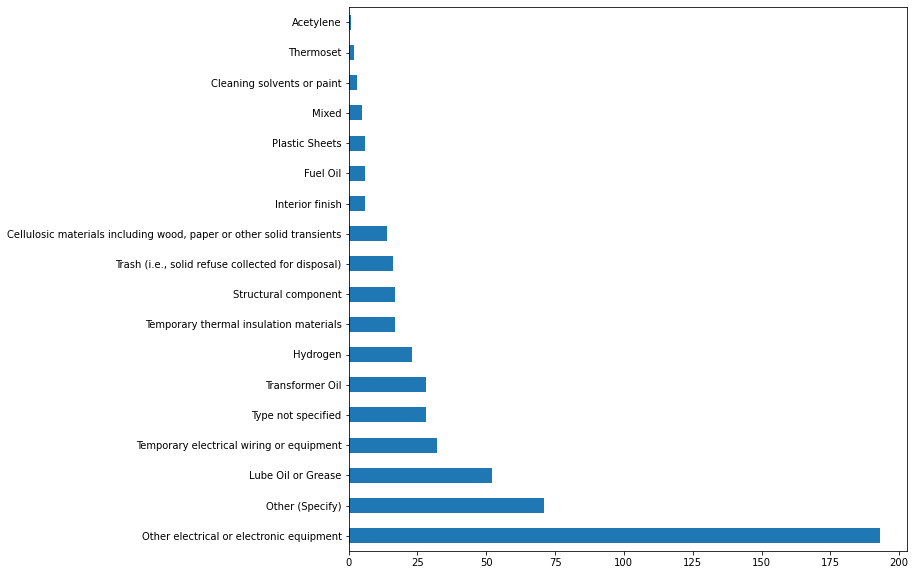

In [5]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_challenging['Type'].value_counts().plot(kind='barh', figsize = [10, 10])

In [6]:
counts_barh = df_em_challenging['Type'].value_counts().rename_axis('unique_values').reset_index(name='counts')

counts_barh['percentage'] = (counts_barh['counts'] / counts_barh['counts'].sum()) * 100
counts_barh

,unique_values,counts,percentage
0,Other electrical or electronic equipment,193,37.115385
1,Other (Specify),71,13.653846
2,Lube Oil or Grease,52,10.000000
3,Temporary electrical wiring or equipment,32,6.153846
4,Type not specified,28,5.384615
5,Transformer Oil,28,5.384615
6,Hydrogen,23,4.423077
7,Temporary thermal insulation materials,17,3.269231
8,Structural component,17,3.269231
9,"Trash (i.e., solid refuse collected for disposal)",16,3.076923


In [7]:
counts_barh['counts'].sum()

520

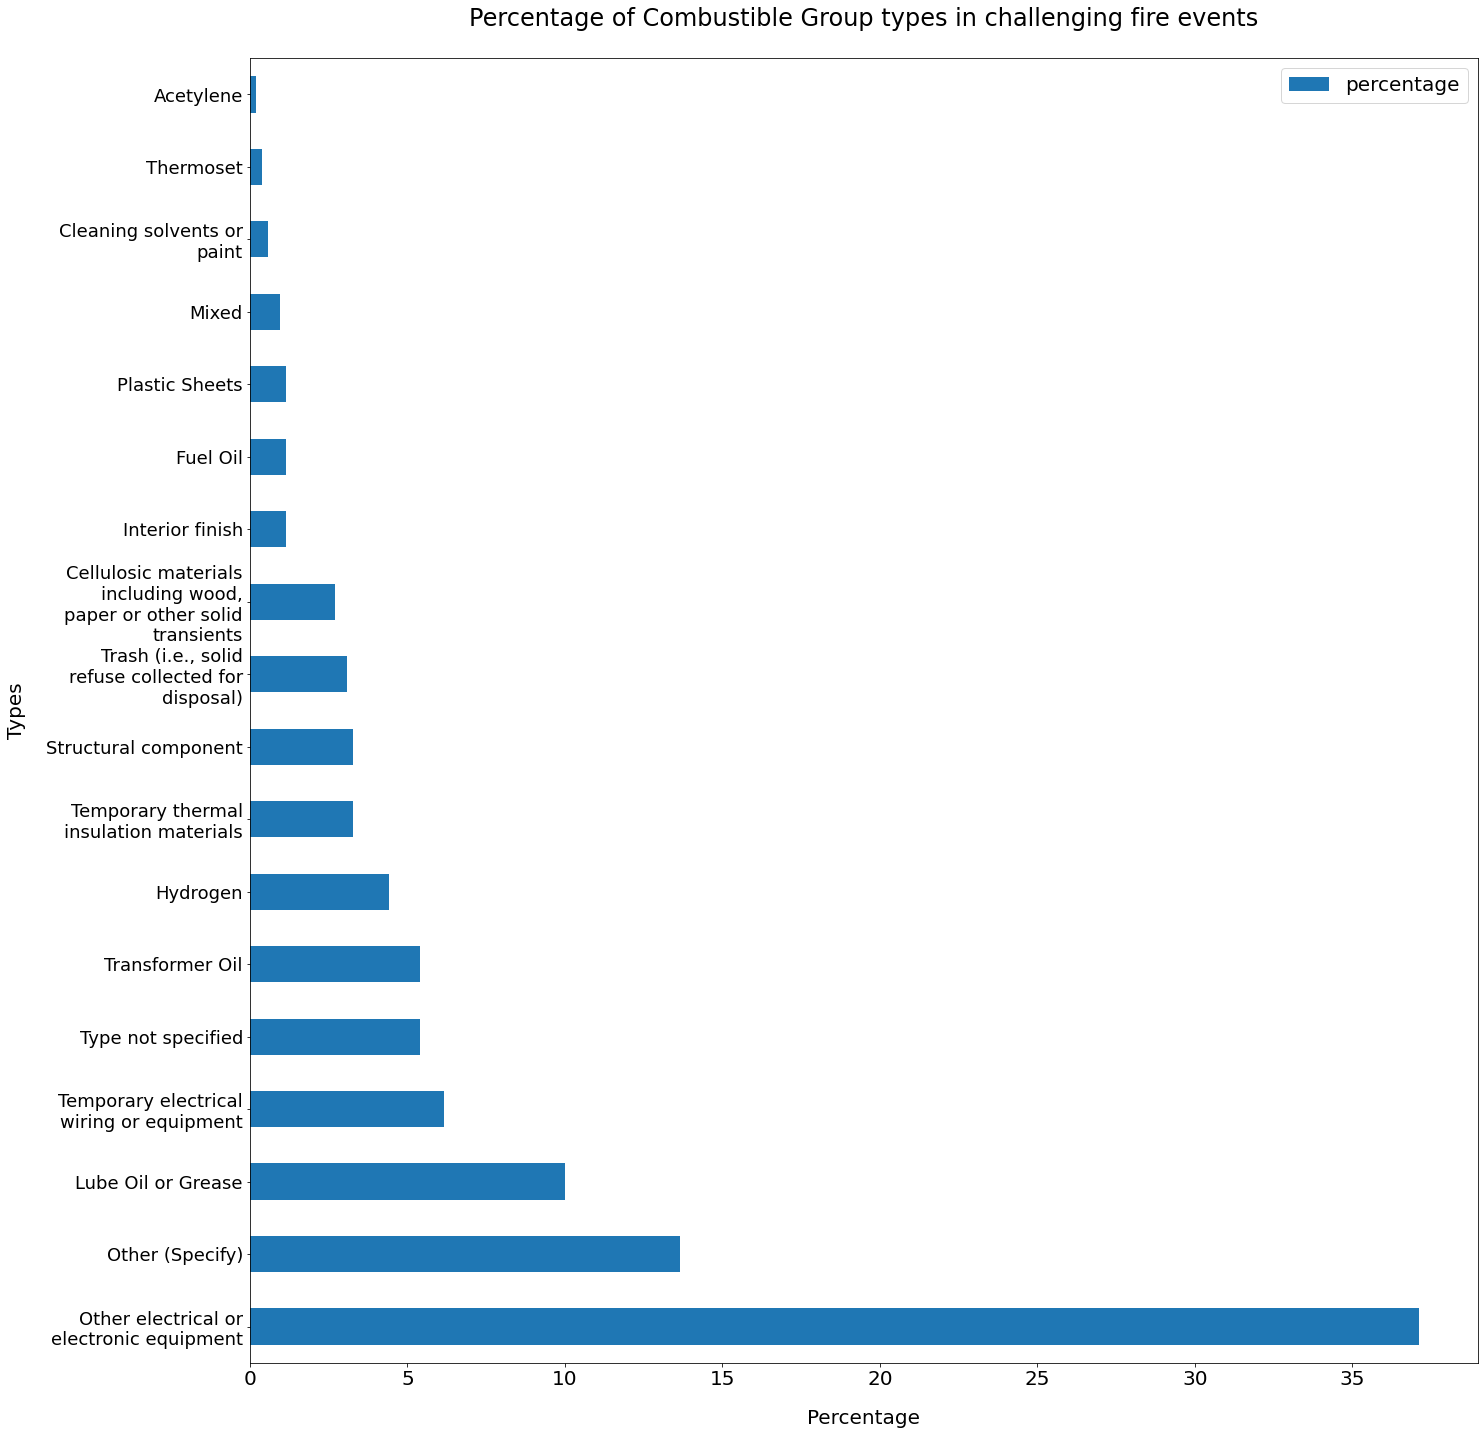

In [8]:
yTickmarks = (counts_barh['unique_values'].unique().tolist())
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

ax = counts_barh.plot(kind='barh', x= 'unique_values', y='percentage', figsize = [22, 24])
ax.set_yticklabels(ylabels, rotation = 0, fontsize = 18)
ax.set_ylabel('Types', fontsize = 20, labelpad = 20)
ax.set_xlabel('Percentage', fontsize = 20, labelpad = 20)
ax.set_title('Percentage of Combustible Group types in challenging fire events', fontsize = 24, x= 0.5, y =1.02)
plt.xticks(fontsize= 20)
ax.legend(fontsize = 20)
plt.savefig(sys_up_dplo + 'Fire Types - Cahellenging - 1990-2014')
plt.show()

In [9]:
# counts_barh.plot(kind='barh', x= 'unique_values', y='percentage', figsize = [22, 20])

In [10]:
ot_chal = df_em_challenging.groupby('Combustible Group')['Type'].apply(lambda x: x[x == 'Other (Specify)'].count())
ot_chal = ot_chal.reset_index(name='counts')
ot_chal['percentage'] = (ot_chal['counts'] /counts_barh['counts'].sum()) * 100
ot_chal

,Combustible Group,counts,percentage
0,Gas,3,0.576923
1,In_Situ,41,7.884615
2,Insulation,0,0.000000
3,Liquid,7,1.346154
4,Transient,17,3.269231
5,Transient_Liquid,1,0.192308
6,Unknown,1,0.192308


In [11]:
print(df_em_challenging['Combustible Group'].value_counts())
print(df_em_challenging['Type'].value_counts())
print(df_em_challenging['Form'].value_counts())

In_Situ             269
Liquid               94
Transient            92
Insulation           36
Gas                  25
Unknown              11
Transient_Liquid      2
Name: Combustible Group, dtype: int64
Other electrical or electronic equipment                                193
Other (Specify)                                                          71
Lube Oil or Grease                                                       52
Temporary electrical wiring or equipment                                 32
Type not specified                                                       28
Transformer Oil                                                          28
Hydrogen                                                                 23
Temporary thermal insulation materials                                   17
Structural component                                                     17
Trash (i.e., solid refuse collected for disposal)                        16
Cellulosic materials including woo

In [12]:
counts_barf = df_em_challenging['Form'].value_counts().rename_axis('unique_values').reset_index(name='counts')

counts_barf['percentage'] = (counts_barf['counts'] / counts_barf['counts'].sum()) * 100
counts_barf

,unique_values,counts,percentage
0,Unconfined spill,31,20.129870
1,Leak - Oil soaked Insulation,31,20.129870
2,Other (Specify),17,11.038961
3,Single Cable,14,9.090909
4,Contained within component,11,7.142857
5,Jet from a pressurized source,10,6.493506
6,Type not specified,6,3.896104
7,Contained within reservoir,6,3.896104
8,Multiple Cables Not In Tray or Bundle,5,3.246753
9,Pressurized in a container,5,3.246753


In [13]:
counts_barf = liq_et['Form'].value_counts().rename_axis('unique_values').reset_index(name='counts')

counts_barf['percentage'] = (counts_barf['counts'] / counts_barf['counts'].sum()) * 100
counts_barf

,unique_values,counts,percentage
0,Unconfined spill,31,36.904762
1,Leak - Oil soaked Insulation,30,35.714286
2,Contained within component,10,11.904762
3,Other (Specify),5,5.952381
4,Spill confined by curbs or other physical feat,4,4.761905
5,Contained within reservoir,4,4.761905


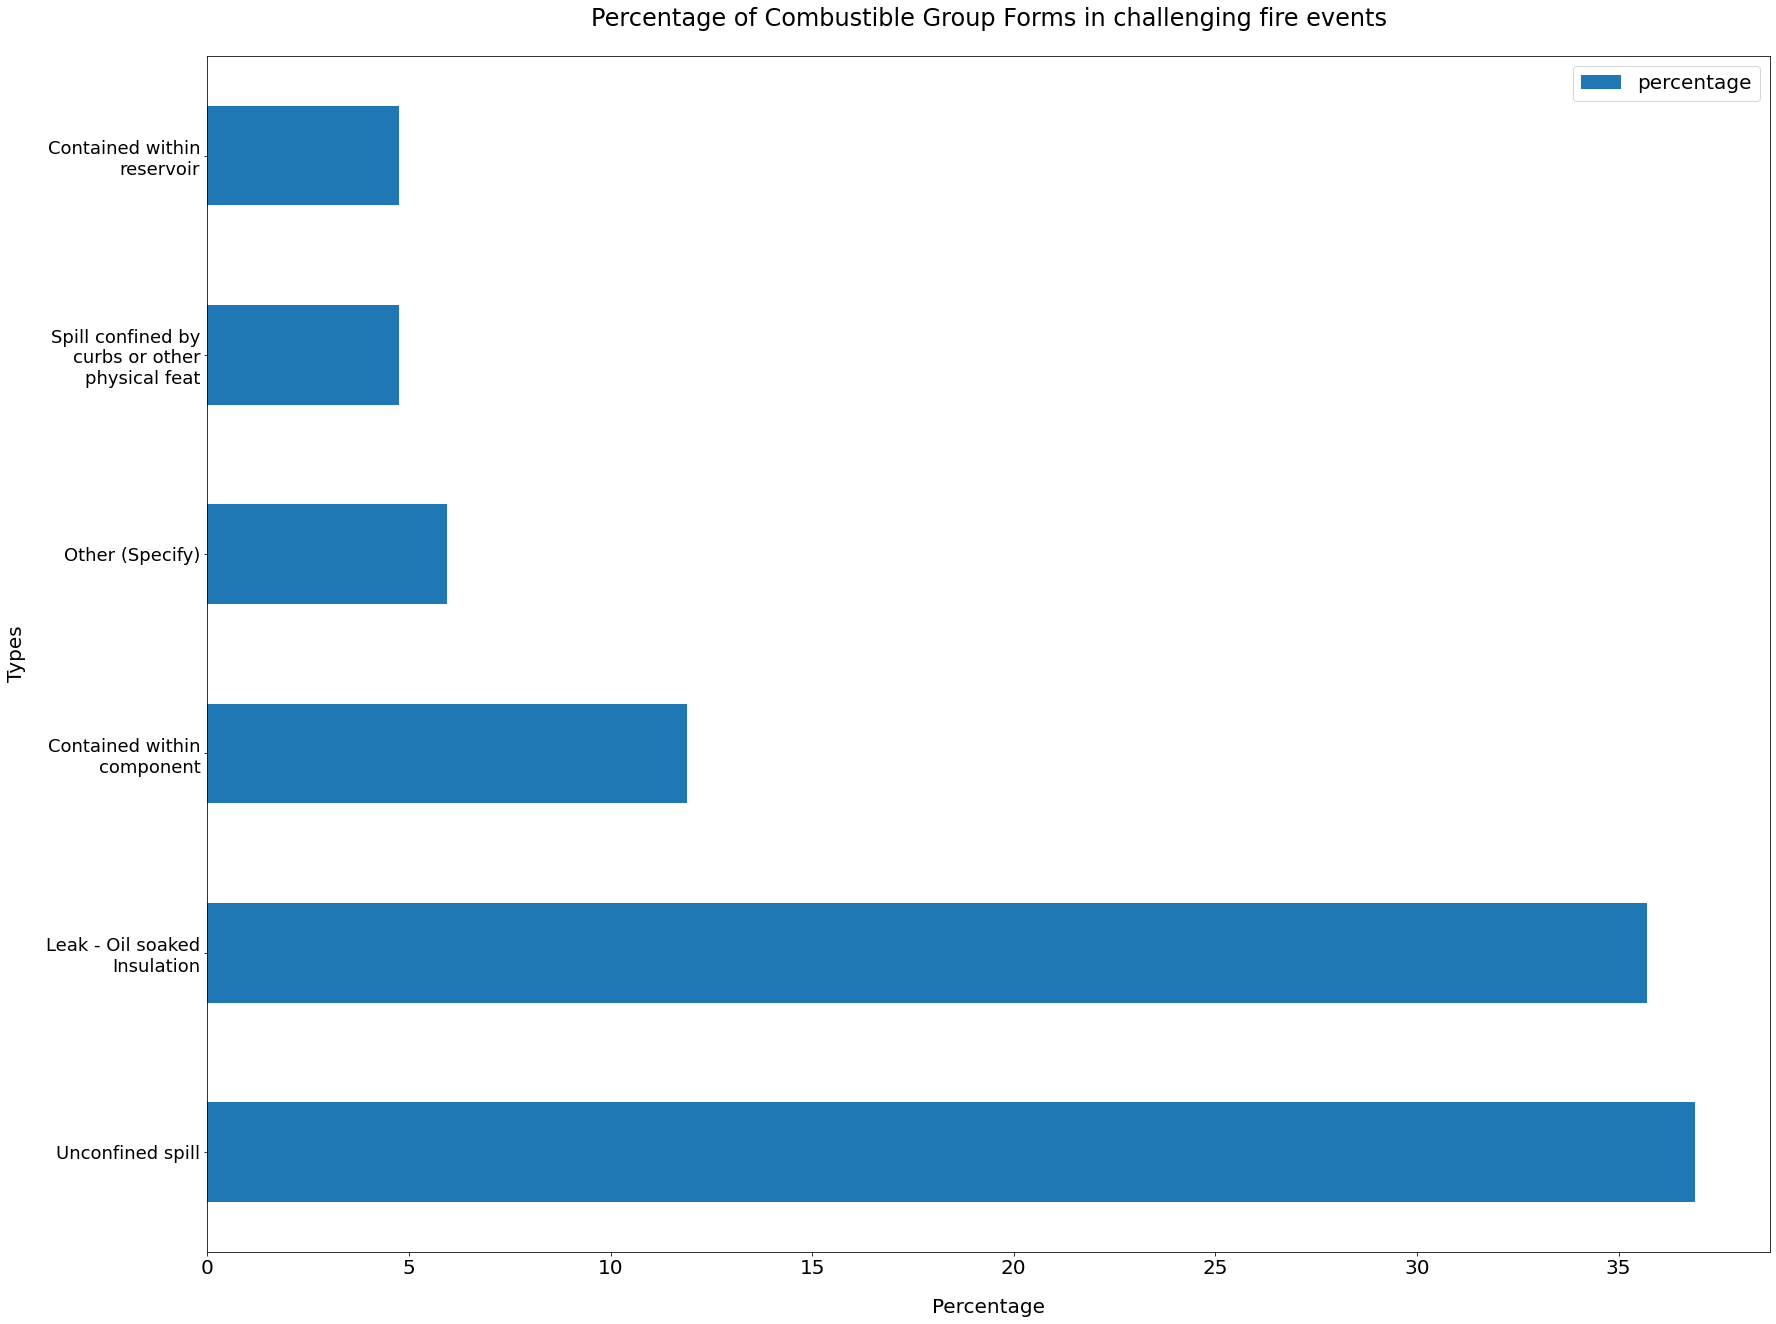

In [14]:
yTickmarks = (counts_barf['unique_values'].unique().tolist())
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

ax = counts_barf.plot(kind='barh', x= 'unique_values', y='percentage', figsize = [28, 22])
ax.set_yticklabels(ylabels, rotation = 0, fontsize = 18)
ax.set_ylabel('Types', fontsize = 20, labelpad = 20)
ax.set_xlabel('Percentage', fontsize = 20, labelpad = 20)
ax.set_title('Percentage of Combustible Group Forms in challenging fire events', fontsize = 24, x= 0.5, y =1.02)
plt.xticks(fontsize= 20)
ax.legend(fontsize = 20)
plt.savefig(sys_up_dplo + 'Combustible Group Form - Cahellenging - 1990-2014')
plt.show()

In [15]:
ot_chal = df_em_challenging.groupby('Combustible Group')['Form'].apply(lambda x: x[x == 'Other (Specify)'].count())
ot_chal = ot_chal.reset_index(name='counts')
ot_chal['percentage'] = (ot_chal['counts'] /counts_barf['counts'].sum()) * 100
ot_chal

,Combustible Group,counts,percentage
0,Gas,5,5.952381
1,In_Situ,0,0.000000
2,Insulation,6,7.142857
3,Liquid,5,5.952381
4,Transient,0,0.000000
5,Transient_Liquid,0,0.000000
6,Unknown,1,1.190476


# Plots

In [16]:
def correlation_plot(group1, group2, siz_x, siz_y):
    df_em_gpft = EPRI_up[[group1, group2]].reset_index(drop = True)
    df_em_gpft = pd.DataFrame(df_em_gpft)
    counts = df_em_gpft.groupby([group1, group2])[group2].count()

    x_list = counts.index.get_level_values(0).tolist()
    y_list = counts.index.get_level_values(1).tolist()
    s      = [6*n for n in counts.values]
    s_c    = [n for n in counts.values]


    xTickmarks = sorted(EPRI_up[group2].dropna().unique().tolist())
    yTickmarks = sorted(EPRI_up[group1].dropna().unique().tolist())

    x = [yTickmarks.index(i) for i in x_list]
    y = [xTickmarks.index(i) for i in y_list]
    
    xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
    ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

    matplotlib.rc('font', serif='Helvetica Neue')
    matplotlib.rc('text', usetex='false')
    matplotlib.rcParams.update({'font.size': 10})
    fig = plt.figure(figsize=(siz_x, siz_y), dpi = 100) # for landscape
    axes1 = fig.add_subplot(111)
    title = '%s - %s' %(group1, group2)
    save  = '%s - %s.png' %(group1, group2)

    plt.scatter(x, y, s = s, c = s_c)
    cb = plt.colorbar()
    cb.set_label('Number of Fire Events', fontsize=12)
    
    axes1.tick_params(axis='both', which='major', pad=10)
    axes1.set_xlim((-1, len(yTickmarks)))
    axes1.set_ylim((-1, len(xTickmarks)))
    axes1.set_xticks(xrange(len(yTickmarks)))
    axes1.set_yticks(xrange(len(xTickmarks)))
    axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 12)
    axes1.set_yticklabels(xlabels, fontsize = 12)
    axes1.set_ylabel(group2, fontsize = 14, labelpad = 20)
    axes1.set_xlabel(group1, fontsize = 14, labelpad = 20)
    axes1.legend(prop={'size':5}, ncol=4)
    axes1.xaxis.grid(True)
    axes1.set_title(title, fontsize = 16, x=0.5, y = 1.05)

    plt.show()
    fig.savefig(sys_updated + save, bbox_inches='tight')
    #fig.savefig(save, bbox_inches='tight')

**Fire Events Years**

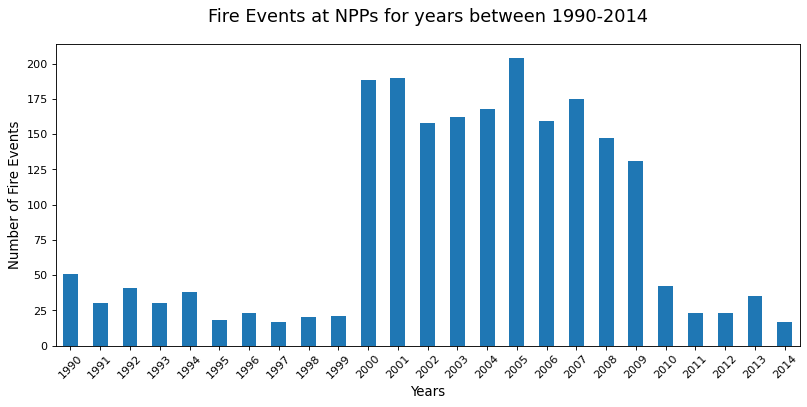

In [17]:
EPRI_up['Event Date_FES'] = pd.to_datetime(EPRI_up['Event Date_FES'])              # Convert to date-time format
EPRI_up['year'] = EPRI_up['Event Date_FES'].dt.year                                # Extract converted years 
df_year = EPRI_up['year'].sort_values(ascending = True)                            # Sort Years
year_labels = sorted(EPRI_up['year'].dropna().unique())
year_labels = np.array(year_labels, dtype=np.float32)

fig_year = plt.figure(figsize=(12, 5), dpi=80)
ax_year  = fig_year.add_subplot(111)
(df_year.value_counts(sort= False, ascending = True).sort_index(ascending = True)).plot(kind ='bar', rot= 45)
ax_year.set_title('Fire Events at NPPs for years between 1990-2014', fontsize=16, y=1.05)
ax_year.set_xlabel('Years', fontsize = 12)
ax_year.set_ylabel('Number of Fire Events', fontsize = 12)
ax_year.set_xticklabels(year_labels.astype(int))
plt.savefig(sys_up_dplo + 'Fire Events 1990-2014')
plt.show()

**Plant Area for Fire Events at NPP for 1990-2014**

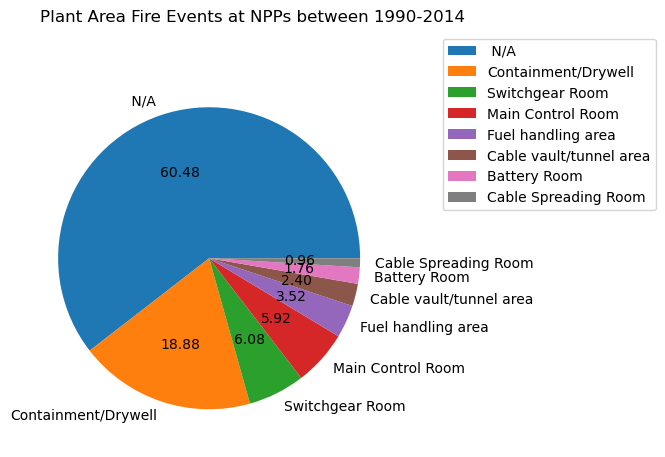

In [18]:
fig_ptar = plt.figure(figsize=(5,5), dpi=100)
ax_ptar = plt.subplot(111)
EPRI_up['Plant Area'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_ptar.suptitle('Plant Area Fire Events at NPPs between 1990-2014', fontsize=12, x = 0.6, y = 1)
ax_ptar.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()
fig_ptar.savefig(sys_up_dplo + "Plant Area.png", bbox_inches='tight')

**NPP Building for Fire Events between (1990-2014)**

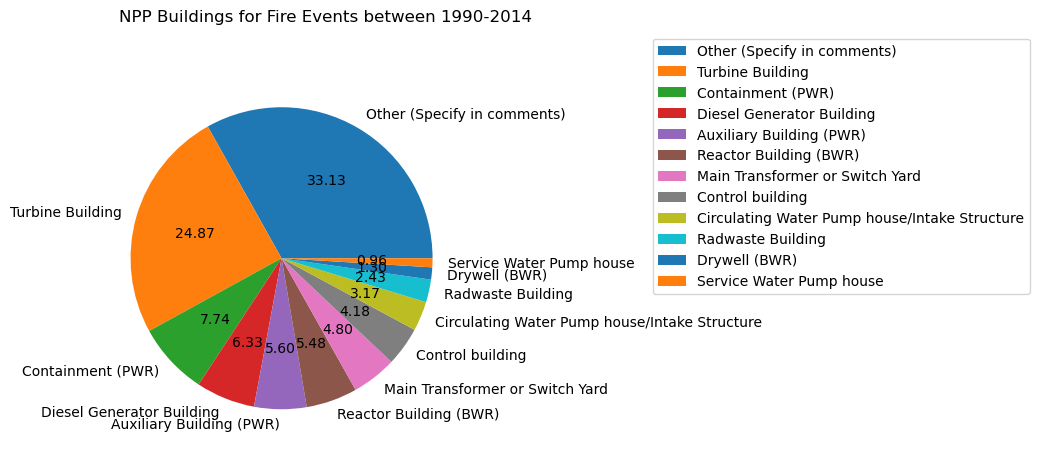

In [19]:
fig_bd = plt.figure(figsize=(5,5), dpi=100)
ax_bd = plt.subplot(111)
EPRI_up['Building'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_bd.suptitle('NPP Buildings for Fire Events between 1990-2014', fontsize=12, x = 0.6, y =1)
ax_bd.legend(bbox_to_anchor=(2.5, 1.1))
plt.show()
fig_bd.savefig(sys_up_dplo + "Building.png", bbox_inches='tight')

**Reactor Mode Prior and After Fire Event Detection**

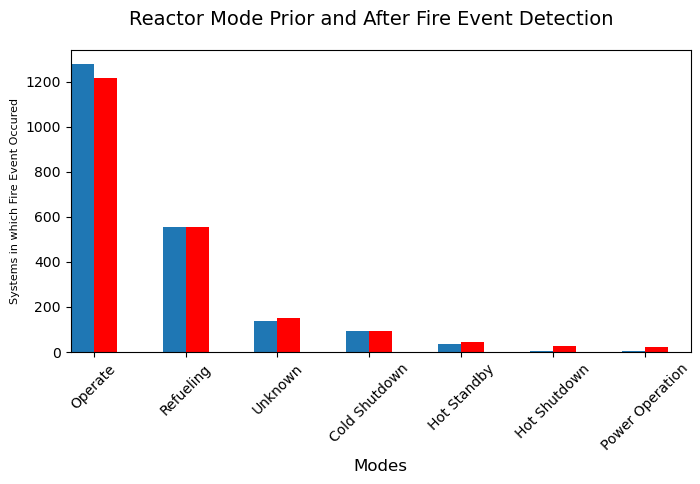

In [20]:
fig_mpa = plt.figure(figsize=(8, 4), dpi=100)
fig_mpa.suptitle('Reactor Mode Prior and After Fire Event Detection', fontsize=14, x = 0.5, y = 0.98)
EPRI_up['Mode Prior'].value_counts(ascending=False).plot(kind='bar', position =1, width = 0.25, rot = 45)
EPRI_up['Mode After'].value_counts(ascending=False).plot(kind='bar', position =0, width = 0.25, color = 'red', rot =45)
plt.ylabel('Systems in which Fire Event Occured', fontsize = 8)
plt.xlabel('Modes', fontsize = 12)
plt.show()
fig_mpa.savefig(sys_up_dplo + "Reactor Mode.png", bbox_inches='tight')

**Primary Combustible Groups for fire events from events between 1990-2014**

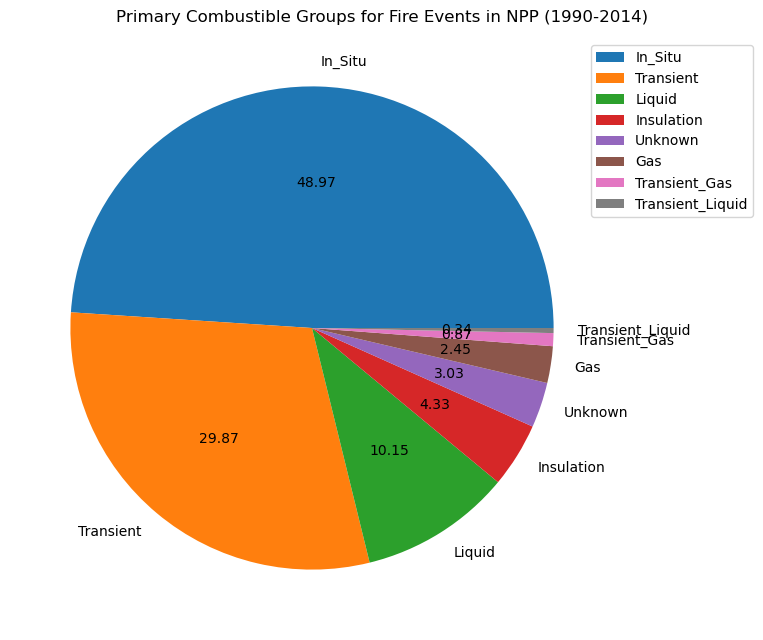

In [21]:
fig_grp = plt.figure(figsize=(8, 8), dpi=100)
ax_grp  = plt.subplot(111)
EPRI_up['Combustible Group'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_grp.suptitle('Primary Combustible Groups for Fire Events in NPP (1990-2014)', fontsize=12, x = 0.6, y = 0.9)
ax_grp.legend(bbox_to_anchor=(0.95, 0.98))
plt.show()
fig_grp.savefig(sys_up_dplo + "Primary Combustible Groups.png", bbox_inches='tight')

**Primary Combustible Groups for challenging fire events from events between 1990-2014**

In [22]:
labels_chal = df_em_challenging['Combustible Group'].unique().tolist()
print(labels_chal)

['Gas', 'Transient', 'In_Situ', 'Liquid', 'Insulation', 'Unknown', 'Transient_Liquid', nan]


In [23]:
explode = (0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0)
df_em_challenging['Combustible Group'].value_counts()

In_Situ             269
Liquid               94
Transient            92
Insulation           36
Gas                  25
Unknown              11
Transient_Liquid      2
Name: Combustible Group, dtype: int64

c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


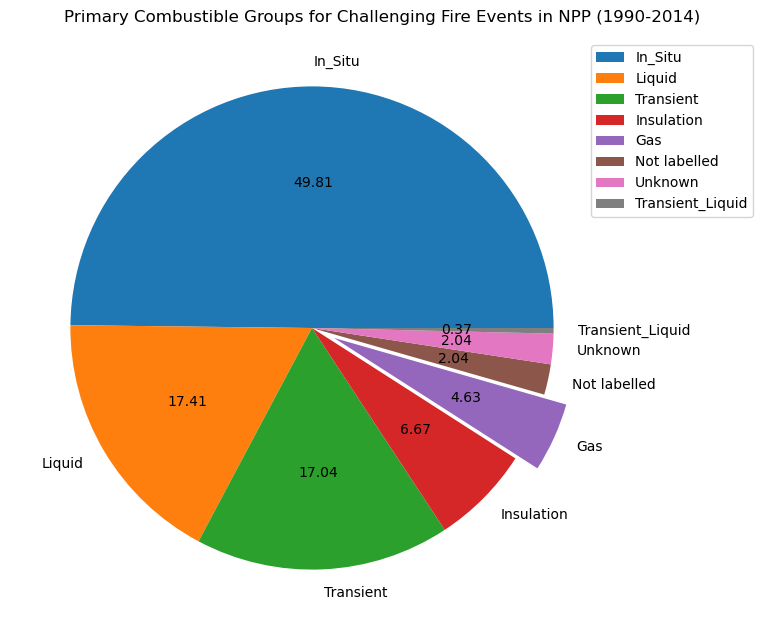

In [24]:
fig_grp = plt.figure(figsize=(8, 8), dpi=100)
ax_grp  = plt.subplot(111)
explode = (0, 0, 0, 0, 0.1, 0, 0, 0)
CHAL = df_em_challenging
CHAL['Combustible Group'] = CHAL['Combustible Group'].replace([np.nan],['Not labelled'])
CHAL['Combustible Group'].value_counts(dropna=False).plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='', explode = explode)
#plt.legend(loc='upper left')
fig_grp.suptitle('Primary Combustible Groups for Challenging Fire Events in NPP (1990-2014)', fontsize=12, x = 0.6, y = 0.9)
ax_grp.legend(bbox_to_anchor=(0.95, 0.98))
plt.show()
fig_grp.savefig(sys_up_dplo + "Primary Combustible Groups Challenging.png", bbox_inches='tight')

**Detection Performance and Fire Level Severity**

c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\matplotlib-3.2.1-py3.7-win-amd64.egg\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\matplotlib-3.2.1-py3.7-win-amd64.egg\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)


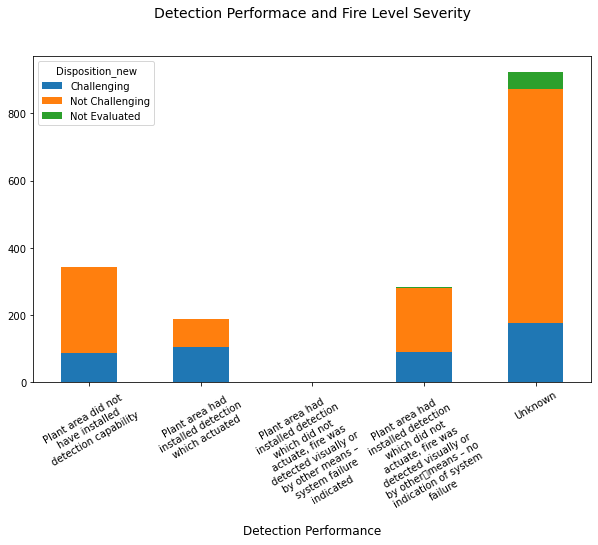

In [25]:
dpfs       = EPRI_up.groupby(['Detection Performance'])['Disposition_new'].value_counts()
ax_dpfs    = dpfs.unstack().plot(kind='bar', stacked = True, figsize = (10,6))
xTickmarks = sorted(EPRI_up['Detection Performance'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_dpfs.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_dpfs.set_xlabel('Detection Performance', fontsize = 12)
#ax_dpfs.legend(prop={'size':10}, ncol=4)
ax_dpfs.set_title('Detection Performace and Fire Level Severity', fontsize = 14, x=0.5, y = 1.1)
plt.savefig(sys_up_dplo + 'Detection Performance-Fire Severity')
plt.show()

**Suppression Time and its relation with Disposition**

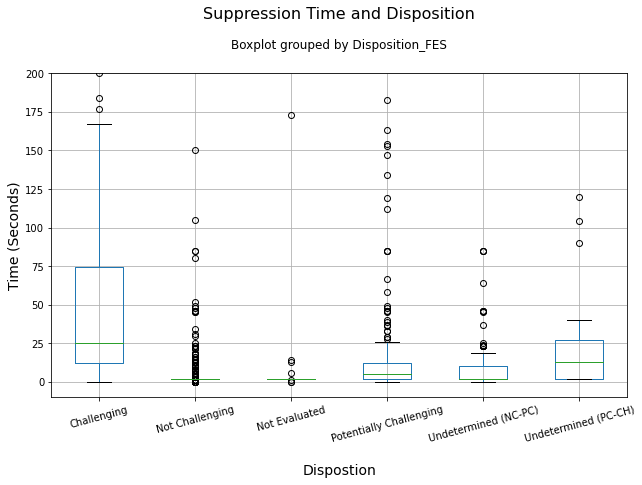

In [26]:
fig, ax_stdp = plt.subplots(figsize=(10, 6))
EPRI_up.boxplot(column=['Suppression Time'], by='Disposition_FES', ax=ax_stdp)
plt.ylim(-10, 200)
plt.ylabel('Time (Seconds)', fontsize = 14)
plt.xticks(rotation = 15)
plt.xlabel('Dispostion', fontsize = 14, labelpad=20)
plt.title('Suppression Time and Disposition', x = 0.5, y = 1.15, fontsize = 16)
plt.savefig(sys_up_dplo + 'Suppression Time-Fire Severity')
plt.show()

**Fire Severity Level in Buildings**

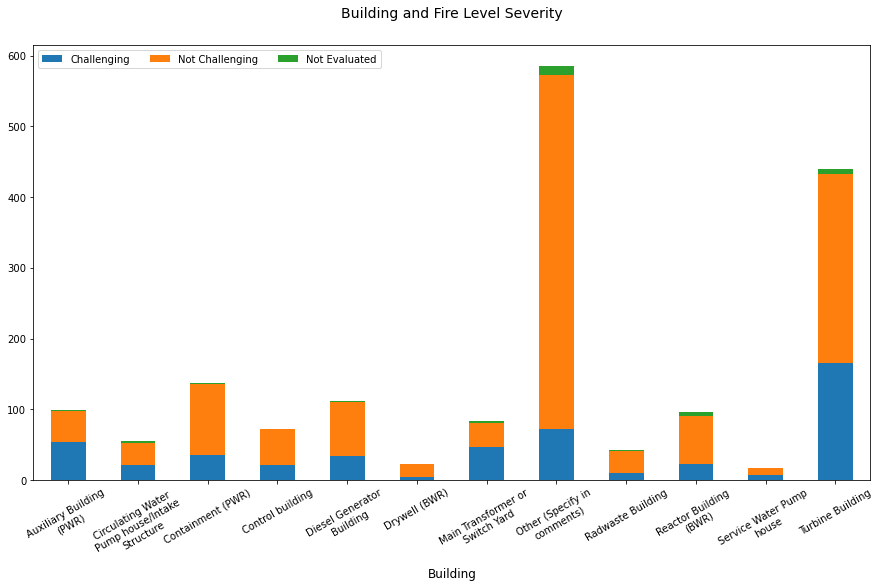

In [27]:
dpbd       = EPRI_up.groupby(['Building'])['Disposition_new'].value_counts()
ax_dpbd    = dpbd.unstack().plot(kind='bar', stacked = True, figsize = (15,8))
xTickmarks = sorted(EPRI_up['Building'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_dpbd.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_dpbd.set_xlabel('Building', fontsize = 12)
ax_dpbd.legend(prop={'size':10}, ncol=4)
ax_dpbd.set_title('Building and Fire Level Severity', fontsize = 14, x=0.5, y = 1.05)
plt.savefig(sys_up_dplo + 'Buildings-Fire Severity')
plt.show()

**Combustible Group and Fire Severity**

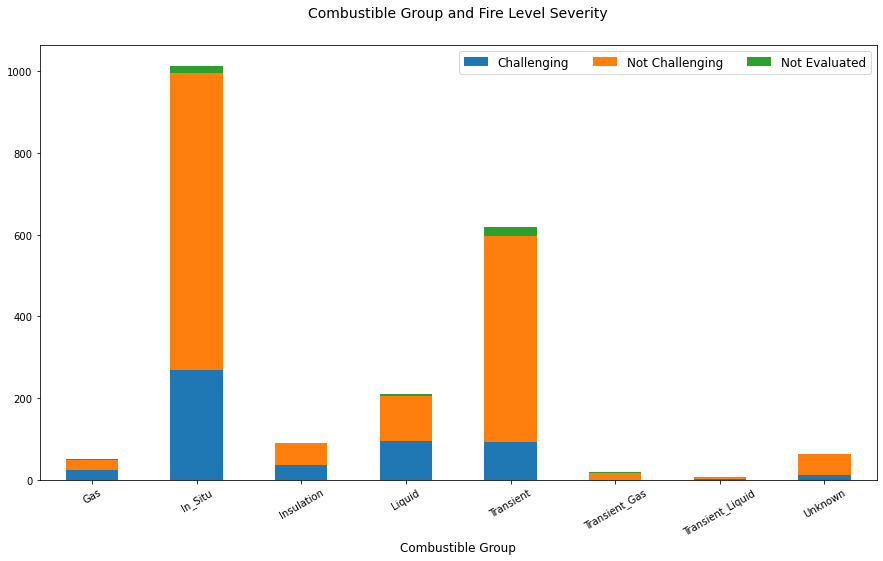

In [28]:
dpcg       = EPRI_up.groupby(['Combustible Group'])['Disposition_new'].value_counts()
ax_dpcg    = dpcg.unstack().plot(kind='bar', stacked = True, figsize = (15,8))
xTickmarks = sorted(EPRI_up['Combustible Group'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_dpcg.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_dpcg.set_xlabel('Combustible Group', fontsize = 12)
ax_dpcg.legend(prop={'size':12}, ncol=4)
ax_dpcg.set_title('Combustible Group and Fire Level Severity', fontsize = 14, x=0.5, y = 1.05)
plt.savefig(sys_up_dplo + 'Combustible Groups-Fire Severity')
plt.show()

**Fire Type and Disposition**

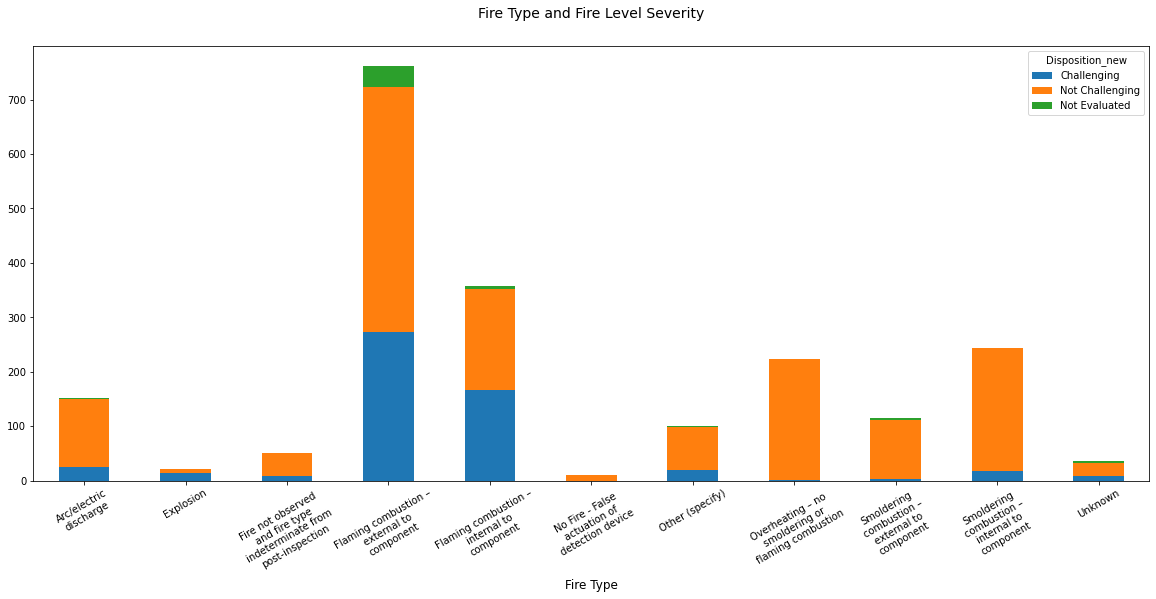

In [29]:
dpft       = EPRI_up.groupby(['Fire Type'])['Disposition_new'].value_counts()
ax_dpft    = dpft.unstack().plot(kind='bar', stacked = True, figsize = (20,8))
xTickmarks = sorted(EPRI_up['Fire Type'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_dpft.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_dpft.set_xlabel('Fire Type', fontsize = 12)
ax_dpfs.legend(prop={'size':10}, ncol=4)
ax_dpft.set_title('Fire Type and Fire Level Severity', fontsize = 14, x=0.5, y = 1.05)
plt.savefig(sys_up_dplo + 'Fire Type-Fire Severity')
plt.show()

**Fire Cause and Fire Severity Level**

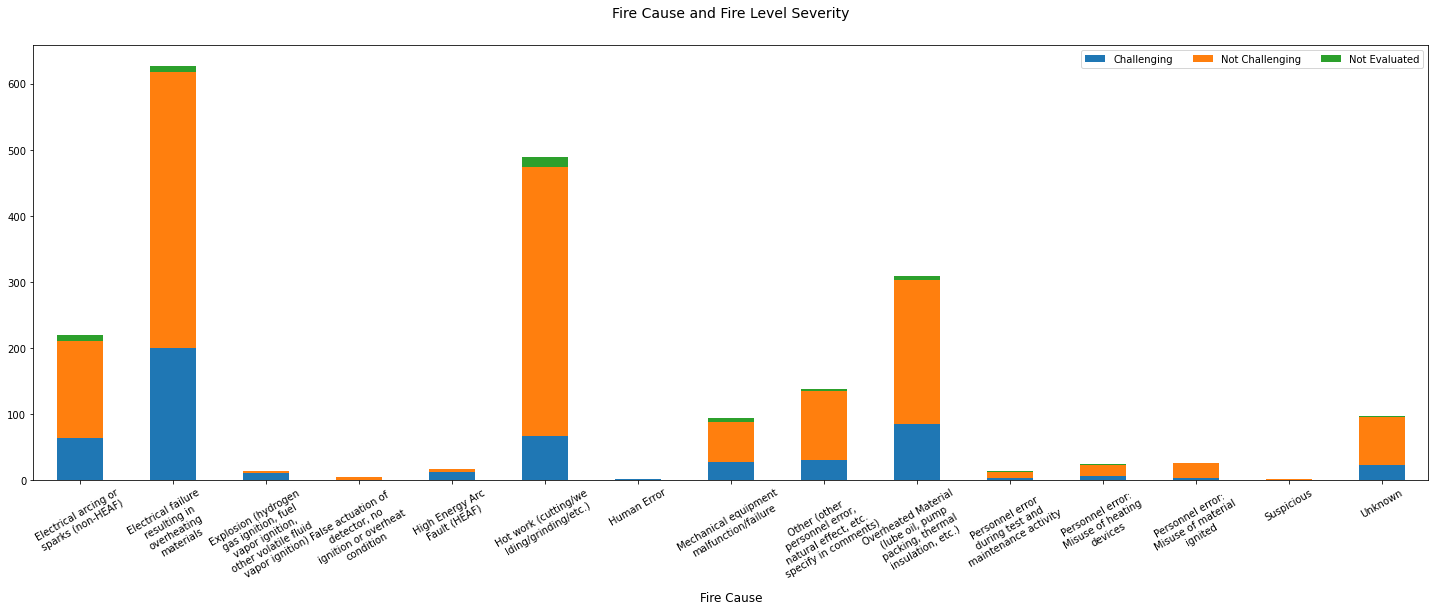

In [30]:
dpfc       = EPRI_up.groupby(['Fire Cause'])['Disposition_new'].value_counts()
ax_dpfc    = dpfc.unstack().plot(kind='bar', stacked = True, figsize = (25,8))
xTickmarks = sorted(EPRI_up['Fire Cause'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_dpfc.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_dpfc.set_xlabel('Fire Cause', fontsize = 12)
ax_dpfc.legend(prop={'size':10}, ncol=4)
ax_dpfc.set_title('Fire Cause and Fire Level Severity', fontsize = 14, x=0.5, y = 1.05)
plt.savefig(sys_up_dplo + 'Fire Cause-Fire Severity')
plt.show()

# Combustible Group

# In-Situ

In [31]:
insitu_et['Type'] = insitu_et['Type'].replace([np.nan],['Not Labelled'])

total_chal = df_em_challenging['Type'].value_counts(dropna=False).sum()
total_ituchal = insitu_et['Type'].value_counts(dropna=False).sum()
print(total_chal)
print(total_ituchal)

insitu_tc = insitu_et['Type'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

insitu_tc['percentage'] = ((insitu_tc['counts'] / total_chal) * 100).round(1)
insitu_tc['percentage_itu'] = ((insitu_tc['counts'] / total_ituchal) * 100).round(1)
insitu_tc

540
269


,unique_values,counts,percentage,percentage_itu
0,Other electrical or electronic equipment,188,34.8,69.9
1,Other (Specify),41,7.6,15.2
2,Structural component,17,3.1,6.3
3,Temporary thermal insulation materials,14,2.6,5.2
4,Interior finish,6,1.1,2.2
5,Type not specified,2,0.4,0.7
6,Not Labelled,1,0.2,0.4


No handles with labels found to put in legend.


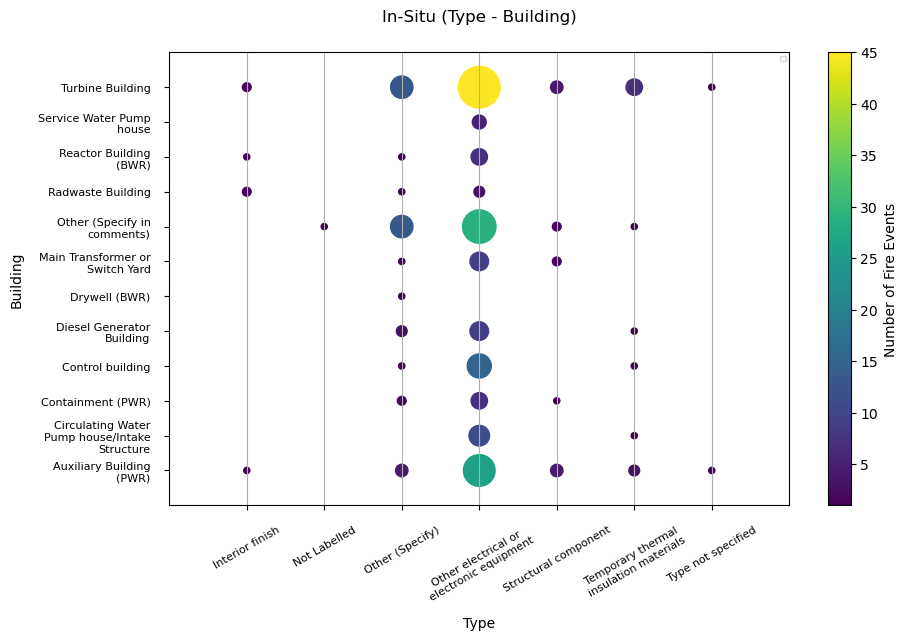

In [32]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'In_Situ']
df_em_gpft = insitu_et[['Type', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [20*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(insitu_et['Building'].dropna().unique().tolist())
yTickmarks = sorted(insitu_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('In-Situ (Type - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'In-Situ (Type - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


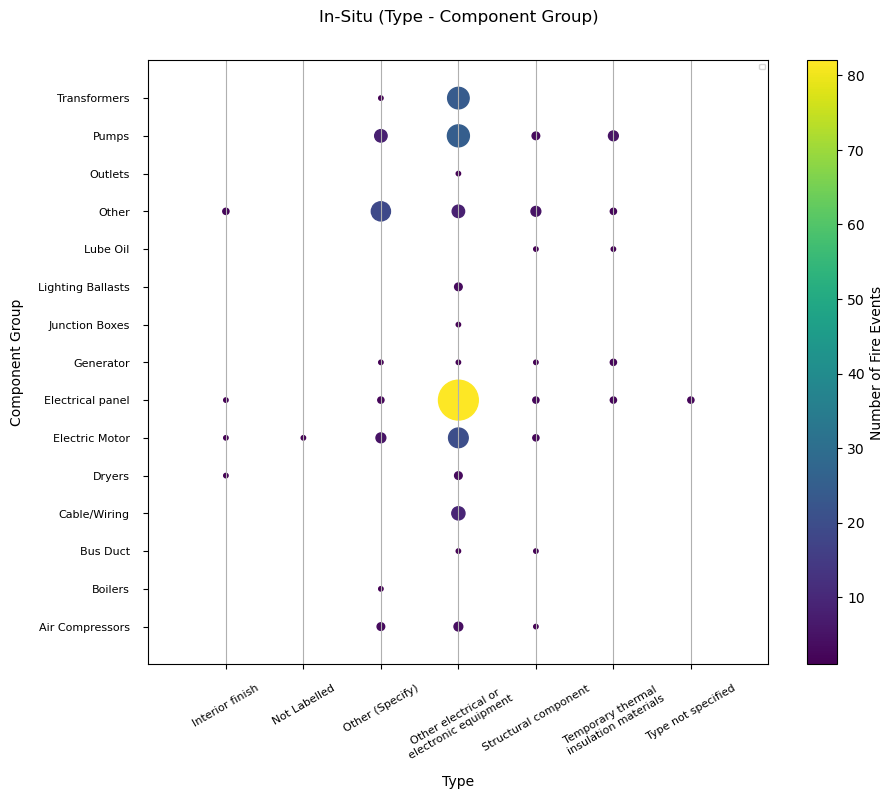

In [33]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'In_Situ']
df_em_gpft = insitu_et[['Type', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [10*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(insitu_et['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(insitu_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 8), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('In-Situ (Type - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'In-Situ (Type - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


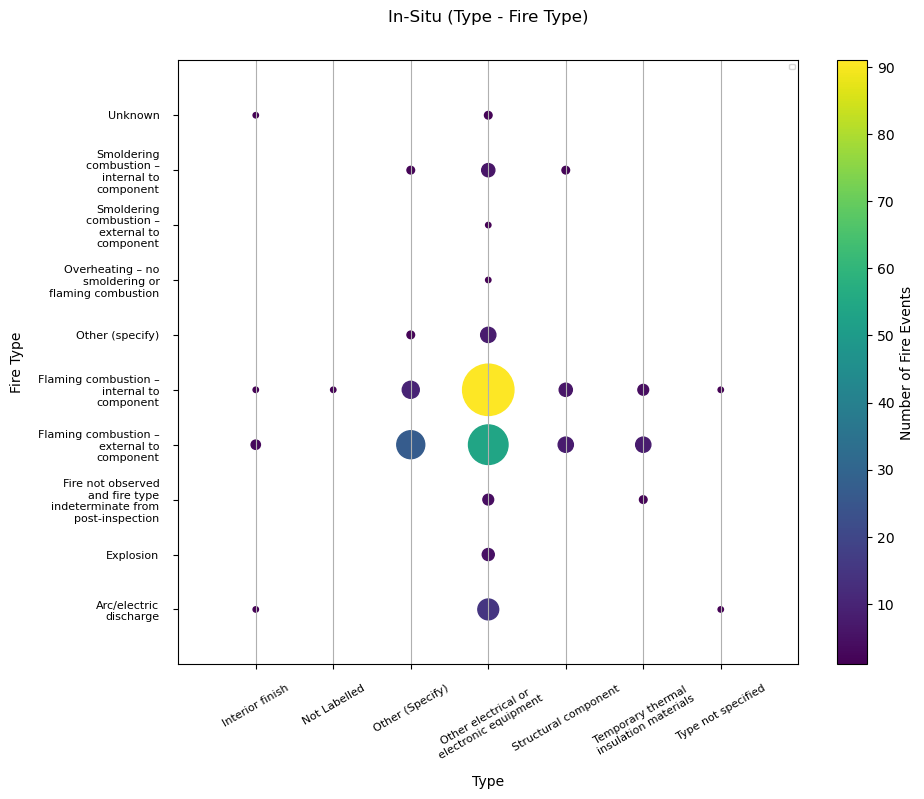

In [34]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'In_Situ']
df_em_gpft = insitu_et[['Type', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [15*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(insitu_et['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(insitu_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 8), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('In-Situ (Type - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'In-Situ (Type - Fire Type)', bbox_inches='tight')

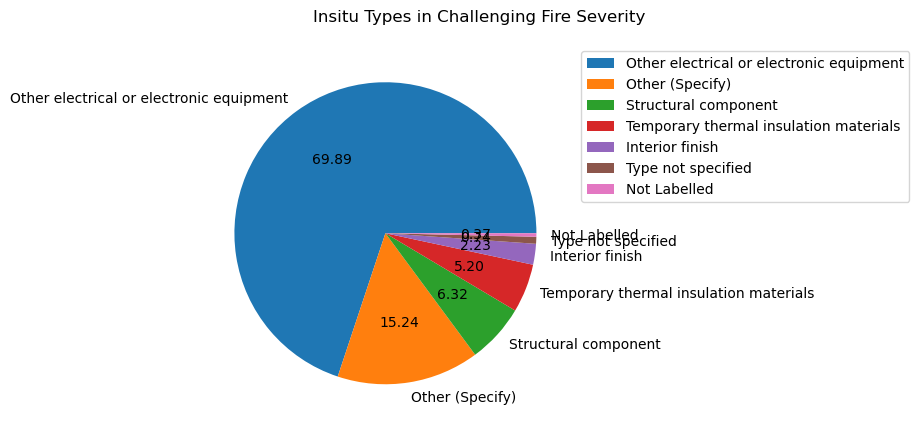

In [35]:
fig_insitu = plt.figure(figsize=(5,5), dpi=100)
ax_insitu = plt.subplot(111)
insitu_et['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_insitu.suptitle('Insitu Types in Challenging Fire Severity', fontsize=12, x = 0.7, y =0.95)
ax_insitu.legend(bbox_to_anchor=(1, 1), fontsize = 10)
plt.show()
fig_insitu.savefig(sys_up_dplo + "Insitu Types pie.png", bbox_inches='tight')

In [36]:
insitu_et['Type'].value_counts(dropna=False)

Other electrical or electronic equipment    188
Other (Specify)                              41
Structural component                         17
Temporary thermal insulation materials       14
Interior finish                               6
Type not specified                            2
Not Labelled                                  1
Name: Type, dtype: int64

# Liquid

In [37]:
liq_et['Type'] = liq_et['Type'].replace([np.nan],['Not Labelled'])

total_chal = df_em_challenging['Type'].value_counts(dropna=False).sum()
total_liqchal = liq_et['Type'].value_counts(dropna=False).sum()
print(total_chal)
print(total_liqchal)

insitu_tc = liq_et['Type'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

insitu_tc['percentage'] = ((insitu_tc['counts'] / total_chal) * 100).round(1)
insitu_tc['percentage_itu'] = ((insitu_tc['counts'] / total_liqchal) * 100).round(1)
insitu_tc

540
94


,unique_values,counts,percentage,percentage_itu
0,Lube Oil or Grease,51,9.4,54.3
1,Transformer Oil,28,5.2,29.8
2,Other (Specify),7,1.3,7.4
3,Fuel Oil,6,1.1,6.4
4,Cleaning solvents or paint,2,0.4,2.1


In [38]:
liq_et['Form'] = liq_et['Form'].replace([np.nan],['Not Labelled'])

total_chal = df_em_challenging['Type'].value_counts(dropna=False).sum()
total_liqchal = liq_et['Form'].value_counts(dropna=False).sum()
print(total_chal)
print(total_liqchal)

insitu_tc = liq_et['Form'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

insitu_tc['percentage'] = ((insitu_tc['counts'] / total_chal) * 100).round(1)
insitu_tc['percentage_itu'] = ((insitu_tc['counts'] / total_liqchal) * 100).round(1)
insitu_tc

540
94


,unique_values,counts,percentage,percentage_itu
0,Unconfined spill,31,5.7,33.0
1,Leak - Oil soaked Insulation,30,5.6,31.9
2,Contained within component,10,1.9,10.6
3,Not Labelled,10,1.9,10.6
4,Other (Specify),5,0.9,5.3
5,Spill confined by curbs or other physical feat,4,0.7,4.3
6,Contained within reservoir,4,0.7,4.3


**Building**

No handles with labels found to put in legend.


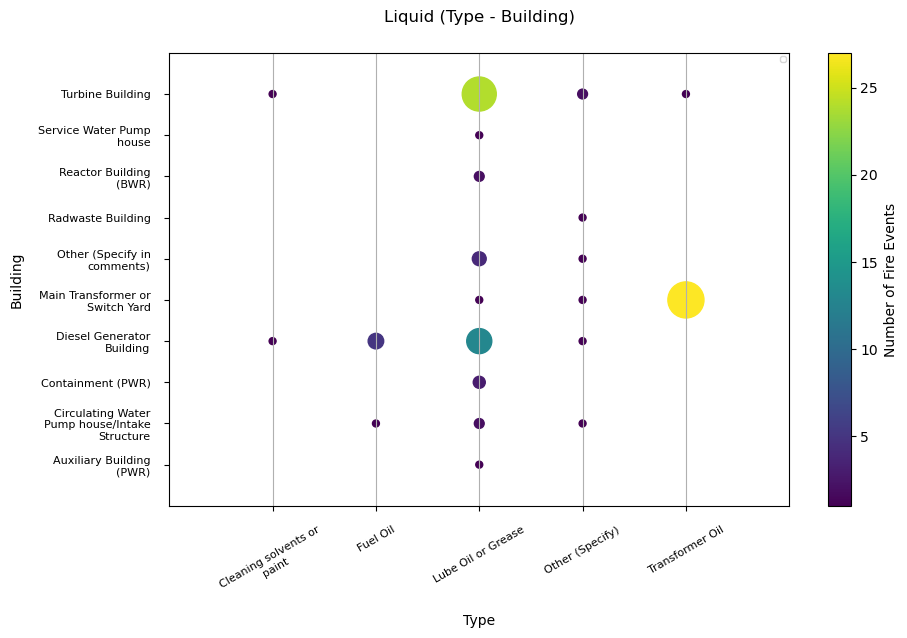

In [39]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_liq = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']
df_em_gpft = df_em_chal_liq[['Type', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_liq['Building'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_liq['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Type - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Liquid (Type - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


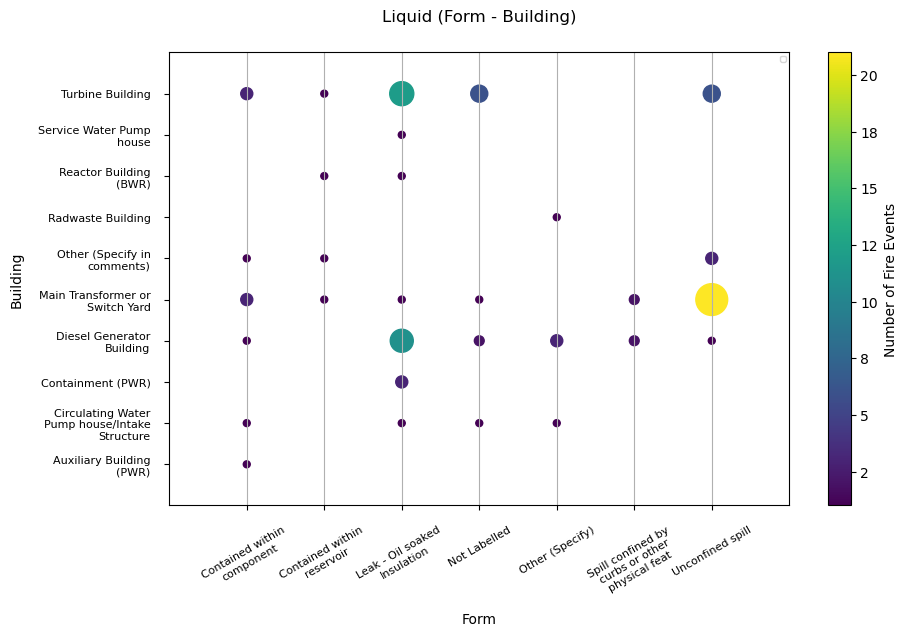

In [40]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_liq = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']
df_em_gpft = liq_et[['Form', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(liq_et['Building'].dropna().unique().tolist())
yTickmarks = sorted(liq_et['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(format='%.0f')
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Form - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Liquid (Form - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


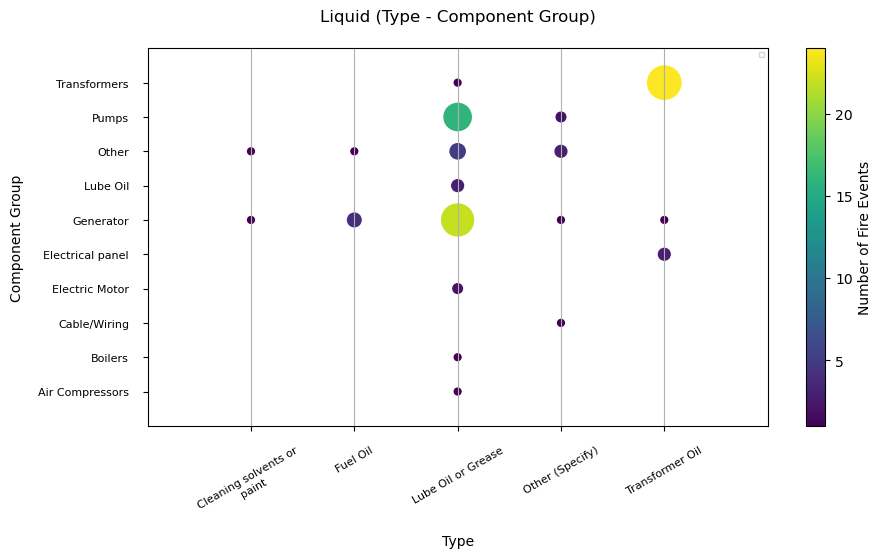

In [41]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_liq = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']
df_em_gpft = df_em_chal_liq[['Type', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [24*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_liq['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_liq['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Type - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Liquid (Type - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


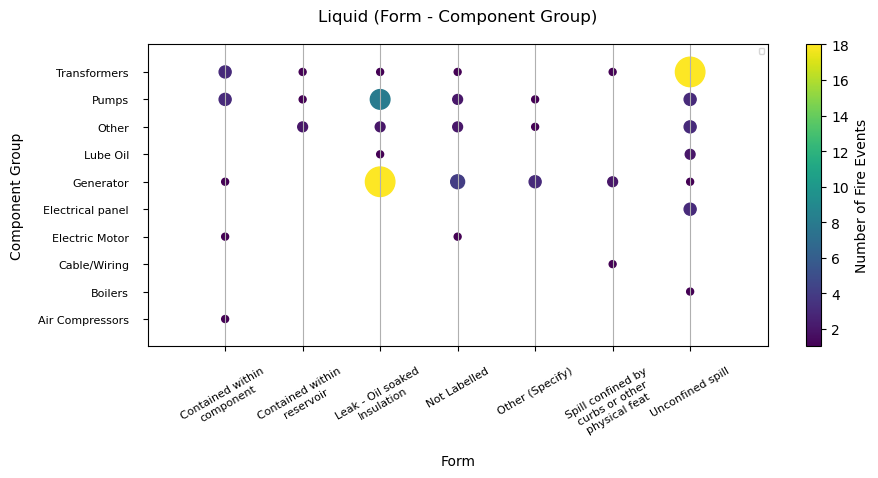

In [42]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_liq = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']
df_em_gpft = liq_et[['Form', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(liq_et['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(liq_et['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 4), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Form - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Liquid (Form - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


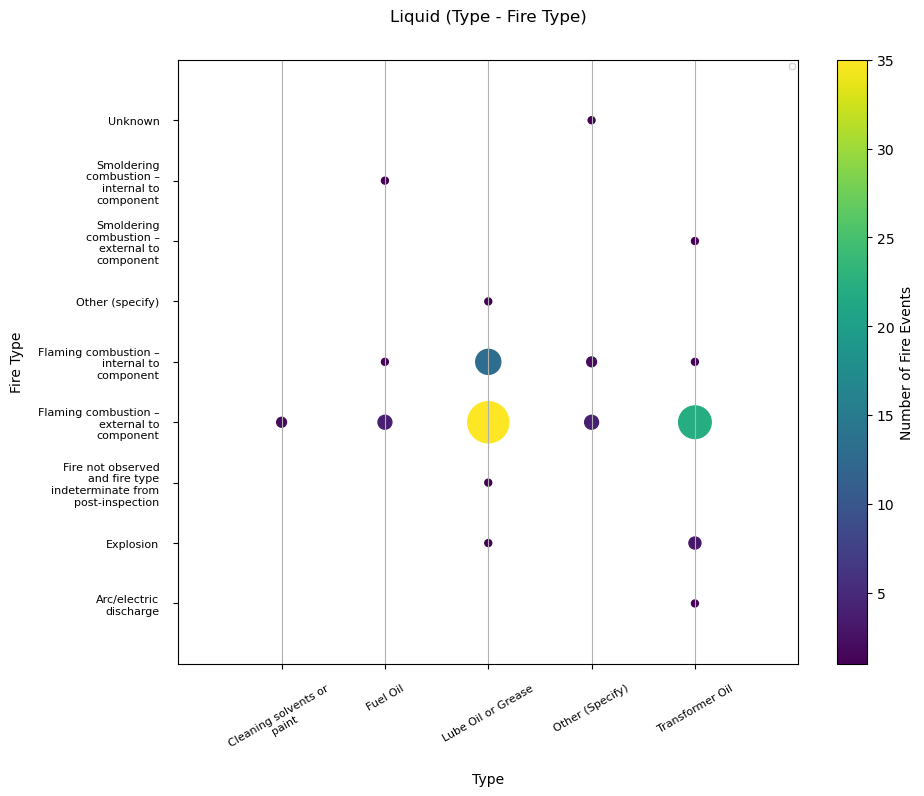

In [43]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_liq = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']
df_em_gpft = df_em_chal_liq[['Type', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_liq['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_liq['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 8), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Type - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Liquid (Type - Fire Type)', bbox_inches='tight')

No handles with labels found to put in legend.


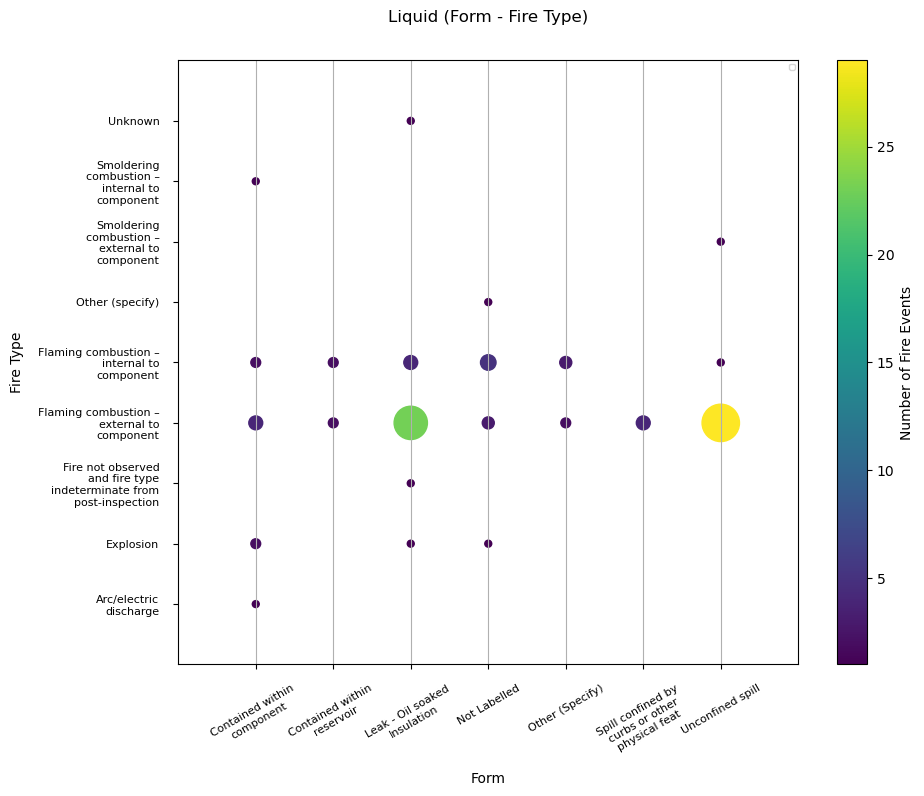

In [44]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_liq = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']
df_em_gpft = liq_et[['Form', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(liq_et['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(liq_et['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 8), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Form - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Liquid (Form - Fire Type)', bbox_inches='tight')

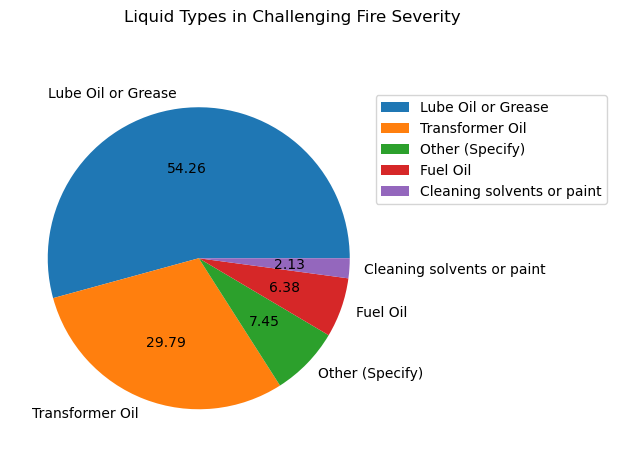

In [45]:
fig_liq = plt.figure(figsize=(5,5), dpi=100)
ax_liq = plt.subplot(111)
liq_et['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_liq.suptitle('Liquid Types in Challenging Fire Severity', fontsize=12, x = 0.7, y =1)
ax_liq.legend(bbox_to_anchor=(0.95, 0.95), fontsize = 10)
plt.show()
fig_liq.savefig(sys_up_dplo + "Liquid Types pie.png", bbox_inches='tight')

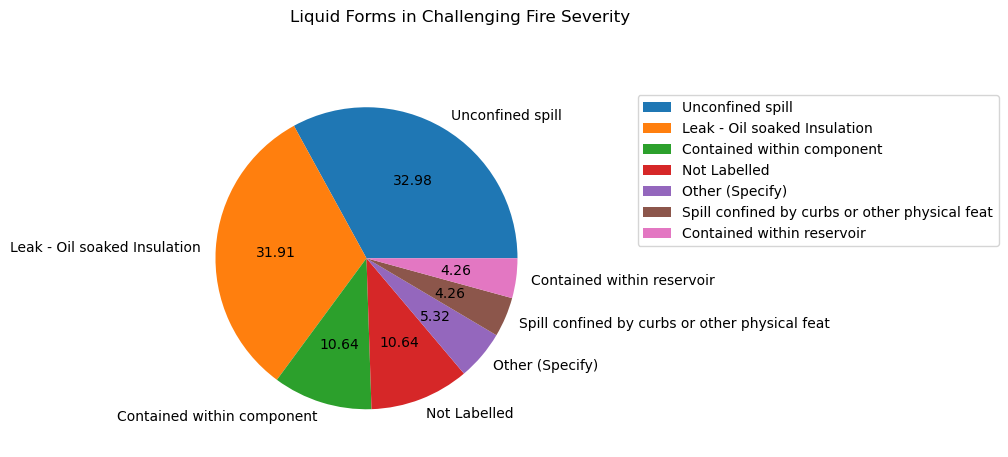

In [46]:
fig_liq = plt.figure(figsize=(5,5), dpi=100)
ax_liq = plt.subplot(111)
liq_et['Form'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_liq.suptitle('Liquid Forms in Challenging Fire Severity', fontsize=12, x = 0.7, y =1)
ax_liq.legend(bbox_to_anchor=(1.20, 0.95), fontsize = 10)
plt.show()
fig_liq.savefig(sys_up_dplo + "Liquid Forms pie.png", bbox_inches='tight')

# Transient

In [47]:
trans_et['Type'] = trans_et['Type'].replace([np.nan],['Not Labelled'])

total_chal = df_em_challenging['Type'].value_counts(dropna=False).sum()
total_transchal = trans_et['Type'].value_counts(dropna=False).sum()
print(total_chal)
print(total_transchal)

insitu_tc = trans_et['Type'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

insitu_tc['percentage'] = ((insitu_tc['counts'] / total_chal) * 100).round(1)
insitu_tc['percentage_itu'] = ((insitu_tc['counts'] / total_transchal) * 100).round(1)
insitu_tc

540
92


,unique_values,counts,percentage,percentage_itu
0,Temporary electrical wiring or equipment,32,5.9,34.8
1,Other (Specify),17,3.1,18.5
2,"Trash (i.e., solid refuse collected for disposal)",16,3.0,17.4
3,"Cellulosic materials including wood, paper or ...",13,2.4,14.1
4,Plastic Sheets,6,1.1,6.5
5,Temporary thermal insulation materials,3,0.6,3.3
6,Other electrical or electronic equipment,3,0.6,3.3
7,Not Labelled,2,0.4,2.2


No handles with labels found to put in legend.


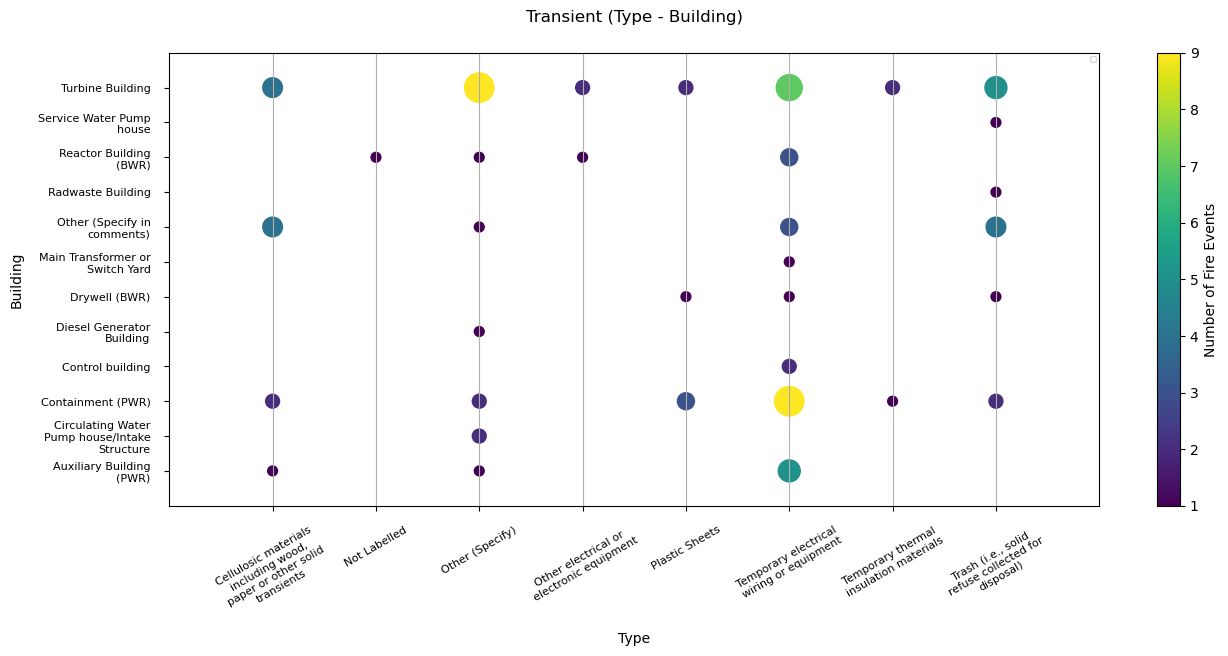

In [48]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_trans = df_em_challenging[df_em_challenging['Combustible Group'] == 'Transient']
df_em_gpft = trans_et[['Type', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(trans_et['Building'].dropna().unique().tolist())
yTickmarks = sorted(trans_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(15, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Transient (Type - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Transient (Type - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


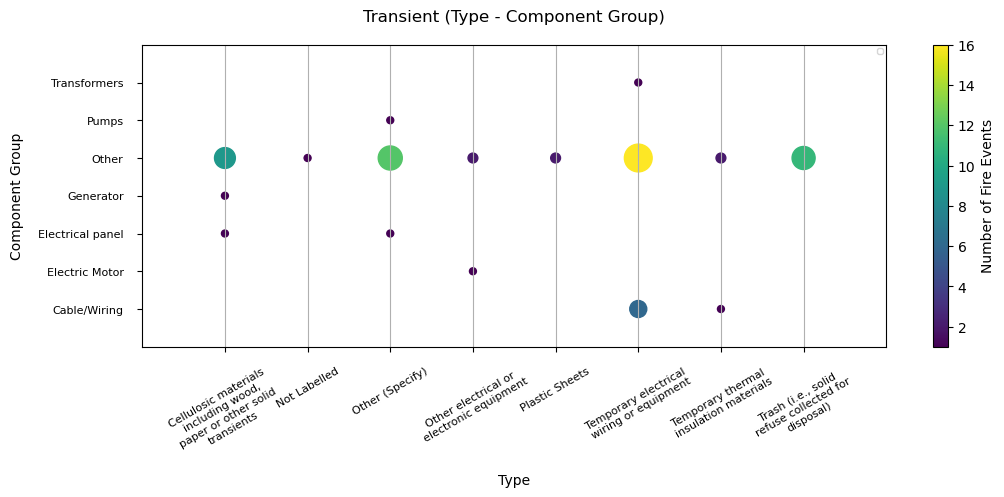

In [49]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_trans = df_em_challenging[df_em_challenging['Combustible Group'] == 'Transient']
df_em_gpft = trans_et[['Type', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(trans_et['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(trans_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(12, 4), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Transient (Type - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Transient (Type - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


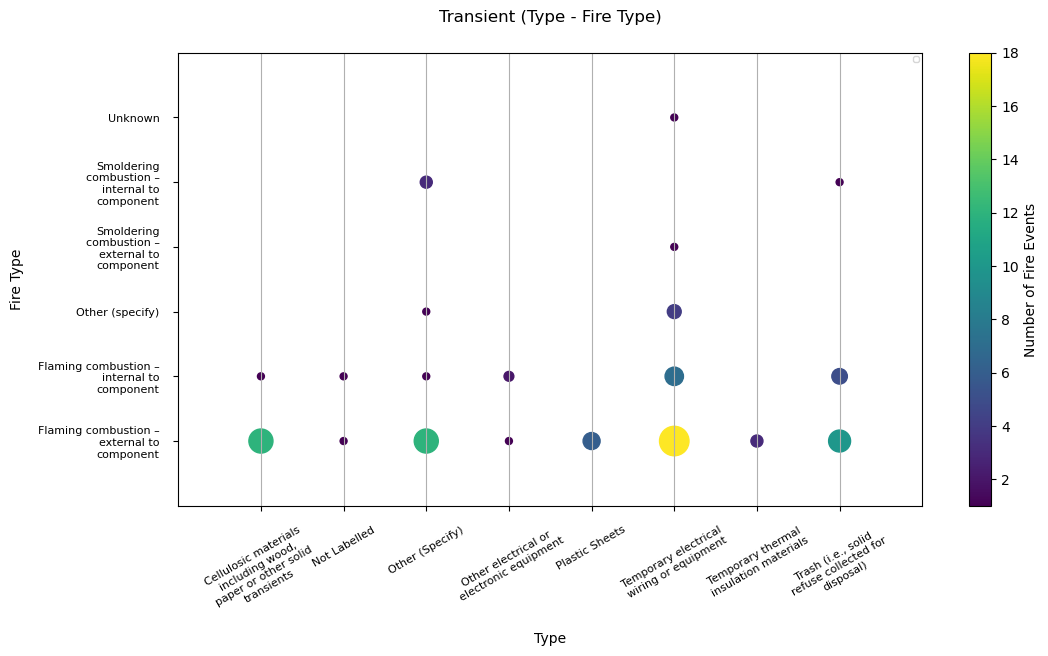

In [50]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_trans = df_em_challenging[df_em_challenging['Combustible Group'] == 'Transient']
df_em_gpft = trans_et[['Type', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(trans_et['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(trans_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(12, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Transient (Type - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Transient (Type - Fire Type)', bbox_inches='tight')

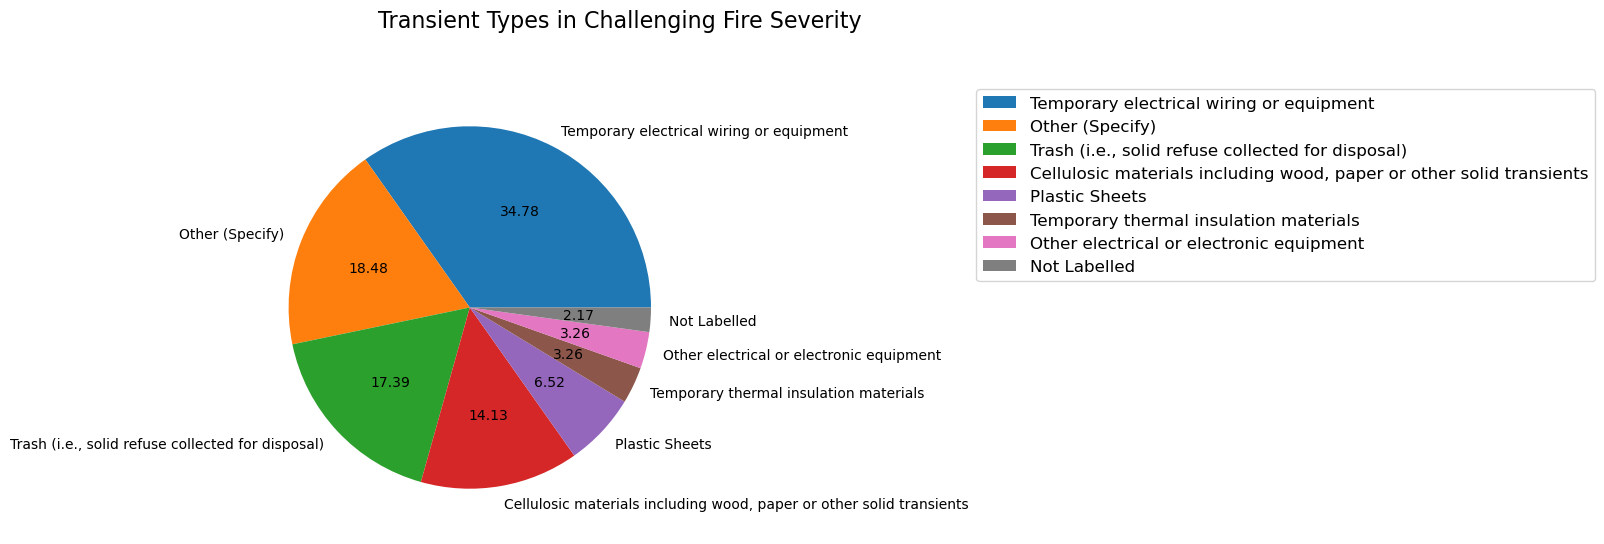

In [51]:
fig_tran = plt.figure(figsize=(8,6), dpi=100)
ax_tran = plt.subplot(111)
trans_et['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_tran.suptitle('Transient Types in Challenging Fire Severity', fontsize=16, x = 0.7, y =1)
ax_tran.legend(bbox_to_anchor=(1.6, 1), fontsize = 12)
plt.show()
fig_tran.savefig(sys_up_dplo + "Transient Types pie.png", bbox_inches='tight')

# Insulation

In [52]:
ins_et['Type'] = ins_et['Type'].replace([np.nan],['Not Labelled'])

total_chal = df_em_challenging['Type'].value_counts(dropna=False).sum()
total_inschal = ins_et['Type'].value_counts(dropna=False).sum()
print(total_chal)
print(total_transchal)

insitu_tc = ins_et['Type'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

insitu_tc['percentage'] = ((insitu_tc['counts'] / total_chal) * 100).round(1)
insitu_tc['percentage_itu'] = ((insitu_tc['counts'] / total_inschal) * 100).round(1)
insitu_tc

540
92


,unique_values,counts,percentage,percentage_itu
0,Type not specified,25,4.6,69.4
1,Mixed,5,0.9,13.9
2,Not Labelled,4,0.7,11.1
3,Thermoset,2,0.4,5.6


In [53]:
ins_et['Form'] = ins_et['Form'].replace([np.nan],['Not Labelled'])

total_chal = df_em_challenging['Type'].value_counts(dropna=False).sum()
total_inschal = ins_et['Form'].value_counts(dropna=False).sum()
print(total_chal)
print(total_transchal)

insitu_tc = ins_et['Form'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

insitu_tc['percentage'] = ((insitu_tc['counts'] / total_chal) * 100).round(1)
insitu_tc['percentage_itu'] = ((insitu_tc['counts'] / total_inschal) * 100).round(1)
insitu_tc

540
92


,unique_values,counts,percentage,percentage_itu
0,Single Cable,13,2.4,36.1
1,Other (Specify),6,1.1,16.7
2,Multiple Cables Not In Tray or Bundle,5,0.9,13.9
3,Unknown,4,0.7,11.1
4,Type not specified,4,0.7,11.1
5,Single Cable Tray,3,0.6,8.3
6,Not Labelled,1,0.2,2.8


No handles with labels found to put in legend.


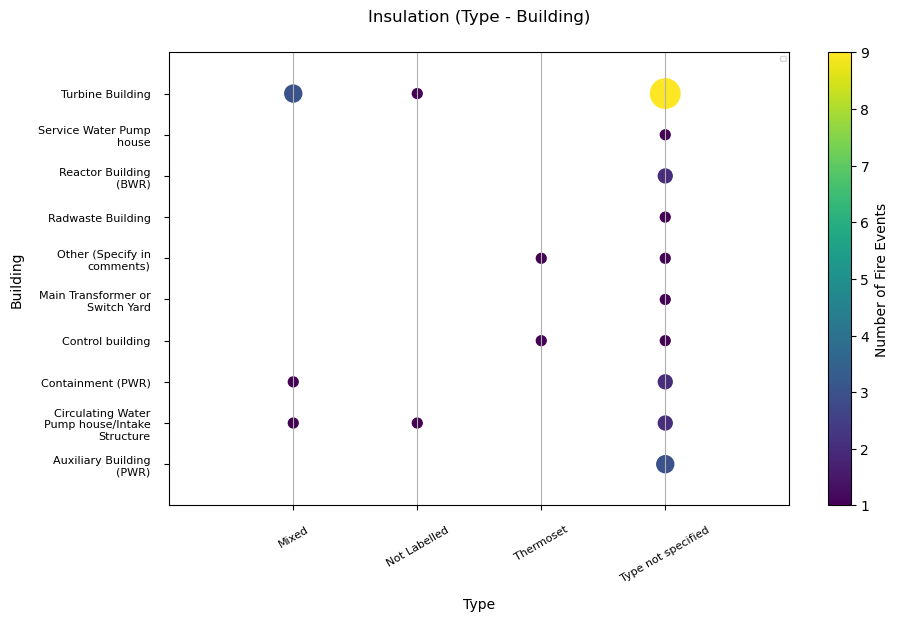

In [54]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_trans = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']
df_em_gpft = ins_et[['Type', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(ins_et['Building'].dropna().unique().tolist())
yTickmarks = sorted(ins_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Type - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Insulation (Type - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


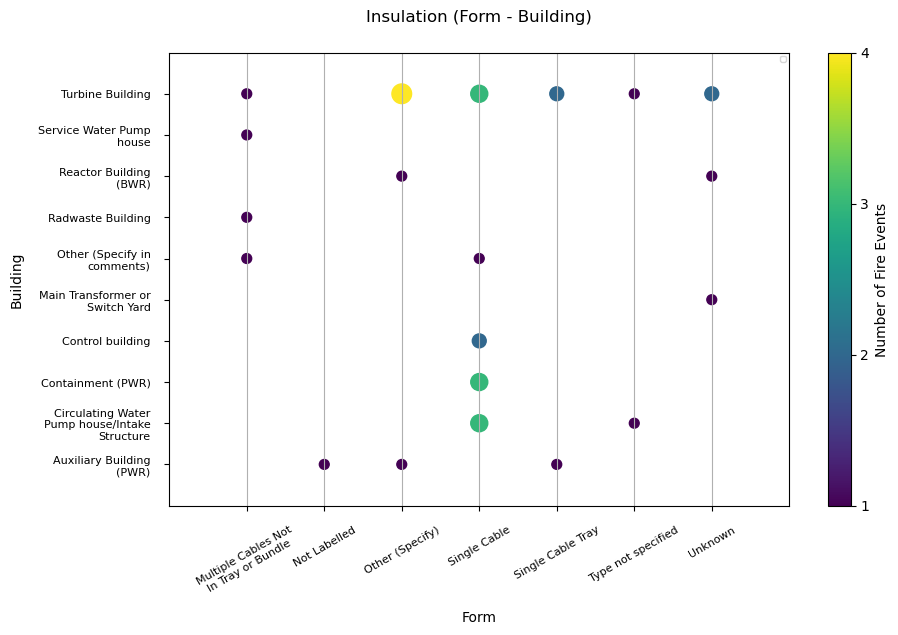

In [55]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_trans = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']
df_em_gpft = ins_et[['Form', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(ins_et['Building'].dropna().unique().tolist())
yTickmarks = sorted(ins_et['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(format='%.0f', ticks=[0,1,2,3,4])
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Form - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Insulation (Form - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


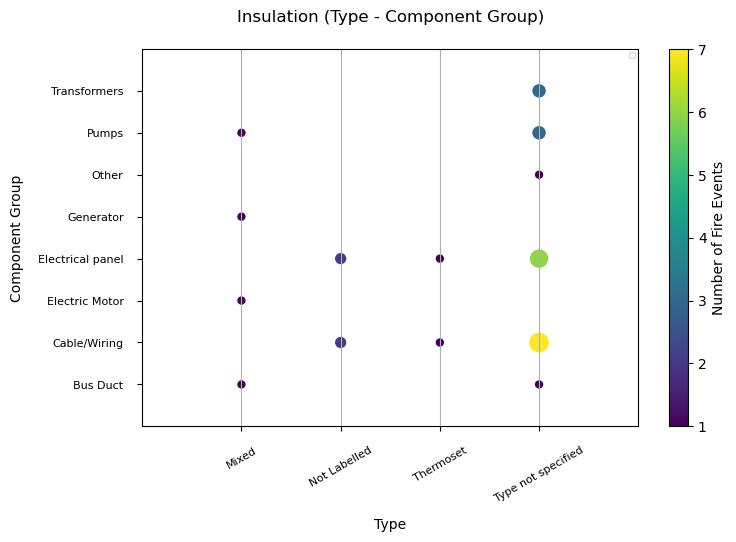

In [56]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_ins = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']
df_em_gpft = ins_et[['Type', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(ins_et['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(ins_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Type - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Insulation (Type - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


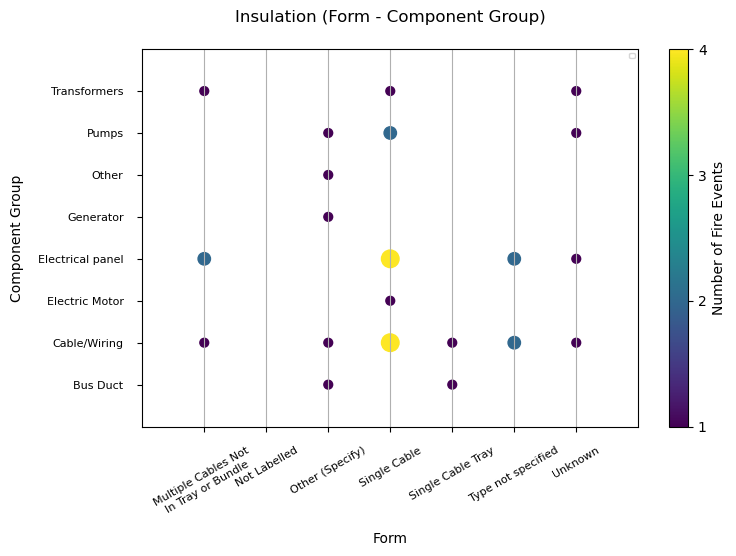

In [57]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_ins = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']
df_em_gpft = ins_et[['Form', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [40*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(ins_et['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(ins_et['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(ticks = [0, 1, 2, 3, 4])
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Form - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Insulation (Form - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


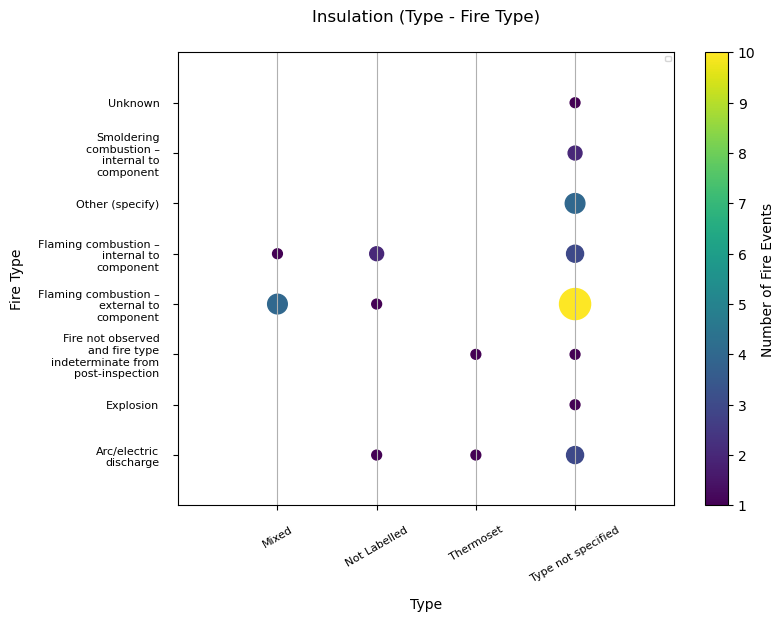

In [58]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_ins = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']
df_em_gpft = ins_et[['Type', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(ins_et['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(ins_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Type - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Insulation (Type - Fire Type)', bbox_inches='tight')

No handles with labels found to put in legend.


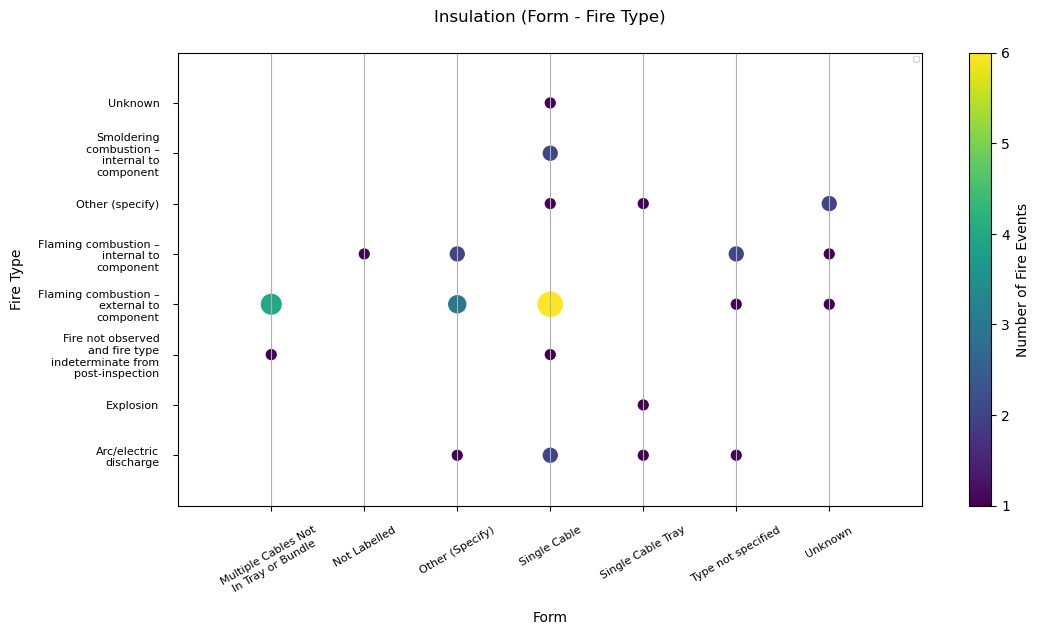

In [59]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_ins = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']
df_em_gpft = ins_et[['Form', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(ins_et['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(ins_et['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(12, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Form - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Insulation (Form - Fire Type)', bbox_inches='tight')

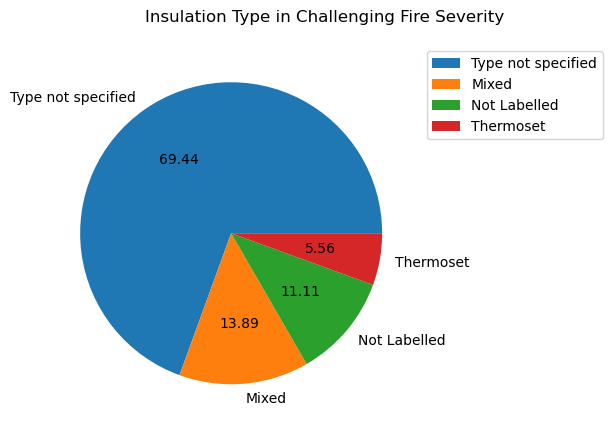

In [60]:
fig_ins = plt.figure(figsize=(5,5), dpi=100)
ax_ins = plt.subplot(111)
ins_et['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_ins.suptitle('Insulation Type in Challenging Fire Severity', fontsize=12, x = 0.7, y =0.95)
ax_ins.legend(bbox_to_anchor=(1, 1), fontsize = 10)
plt.show()
fig_ins.savefig(sys_up_dplo + "Insulation Type pie.png", bbox_inches='tight')

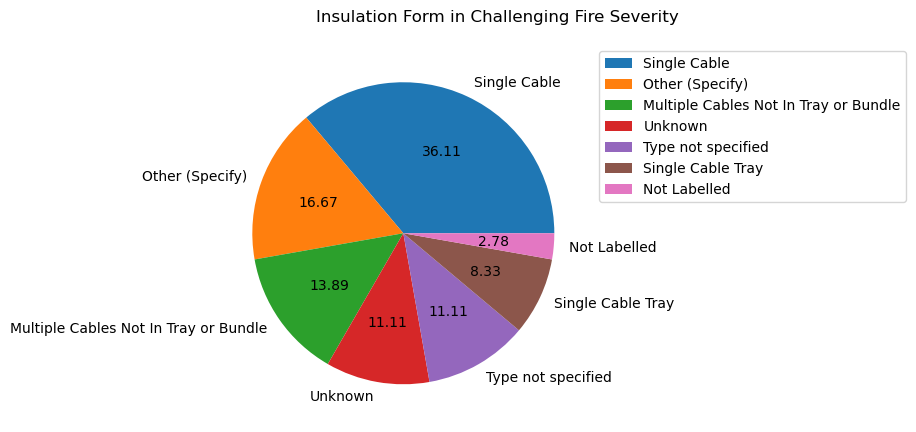

In [61]:
fig_ins = plt.figure(figsize=(5,5), dpi=100)
ax_ins = plt.subplot(111)
ins_et['Form'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_ins.suptitle('Insulation Form in Challenging Fire Severity', fontsize=12, x = 0.7, y =0.95)
ax_ins.legend(bbox_to_anchor=(1, 1), fontsize = 10)
plt.show()
fig_ins.savefig(sys_up_dplo + "Insulation Form pie.png", bbox_inches='tight')

# Gas

In [62]:
gas_et['Type'] = gas_et['Type'].replace([np.nan],['Not Labelled'])

total_chal = df_em_challenging['Type'].value_counts(dropna=False).sum()
total_inschal = gas_et['Type'].value_counts(dropna=False).sum()
print(total_chal)
print(total_transchal)

insitu_tc = gas_et['Type'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

insitu_tc['percentage'] = ((insitu_tc['counts'] / total_chal) * 100).round(1)
insitu_tc['percentage_itu'] = ((insitu_tc['counts'] / total_inschal) * 100).round(1)
insitu_tc

540
92


,unique_values,counts,percentage,percentage_itu
0,Hydrogen,21,3.9,84.0
1,Other (Specify),3,0.6,12.0
2,Acetylene,1,0.2,4.0


In [63]:
gas_et['Form'] = gas_et['Form'].replace([np.nan],['Not Labelled'])

total_chal = df_em_challenging['Type'].value_counts(dropna=False).sum()
total_inschal = gas_et['Type'].value_counts(dropna=False).sum()
print(total_chal)
print(total_transchal)

insitu_tc = gas_et['Form'].value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')

insitu_tc['percentage'] = ((insitu_tc['counts'] / total_chal) * 100).round(1)
insitu_tc['percentage_itu'] = ((insitu_tc['counts'] / total_inschal) * 100).round(1)
insitu_tc

540
92


,unique_values,counts,percentage,percentage_itu
0,Jet from a pressurized source,9,1.7,36.0
1,Pressurized in a container,5,0.9,20.0
2,Other (Specify),5,0.9,20.0
3,"Ambient pressure, within a compartment",2,0.4,8.0
4,Not Labelled,2,0.4,8.0
5,"Ambient pressure, within a component",2,0.4,8.0


No handles with labels found to put in legend.


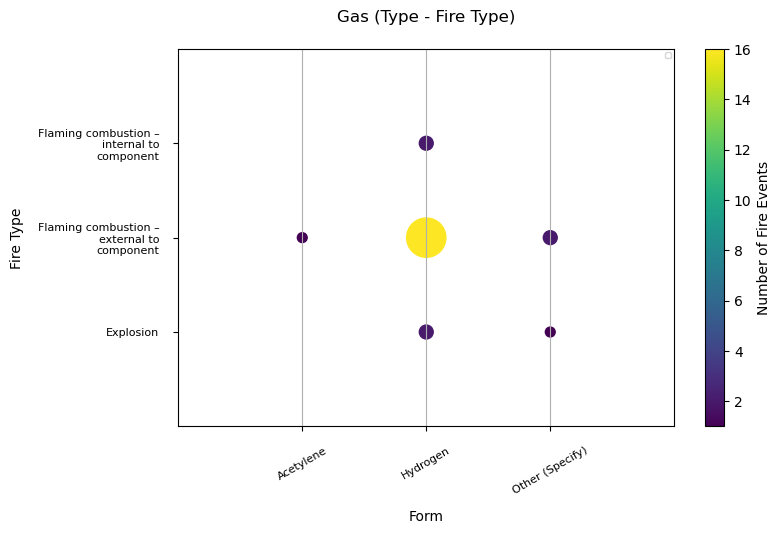

In [64]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']
df_em_gpft = gas_et[['Type', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(gas_et['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(gas_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas (Type - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Gas (Type - Fire Type)', bbox_inches='tight')

No handles with labels found to put in legend.


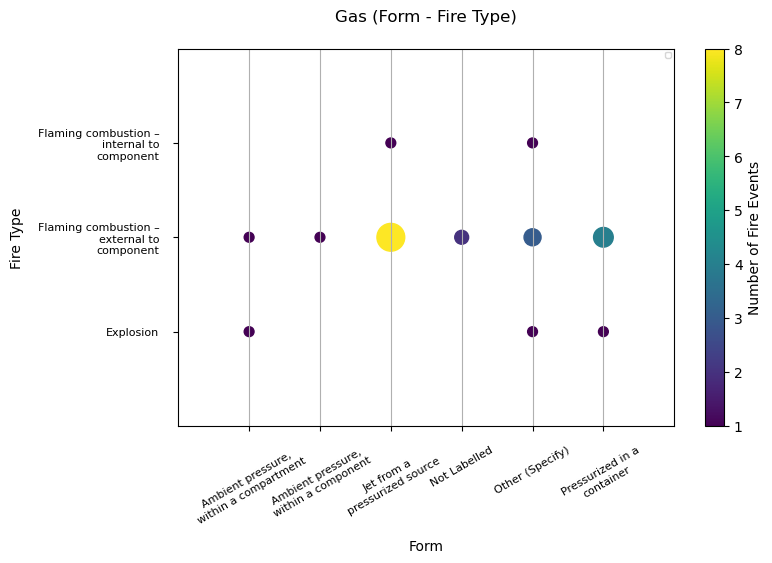

In [65]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']
df_em_gpft = gas_et[['Form', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(gas_et['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(gas_et['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas (Form - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Gas (Form - Fire Type)', bbox_inches='tight')

No handles with labels found to put in legend.


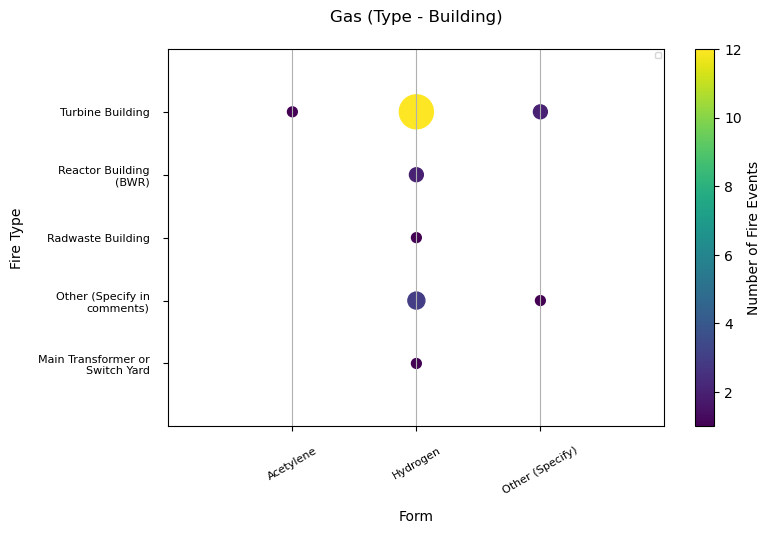

In [66]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']
df_em_gpft = gas_et[['Type', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(gas_et['Building'].dropna().unique().tolist())
yTickmarks = sorted(gas_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas (Type - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Gas (Type - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


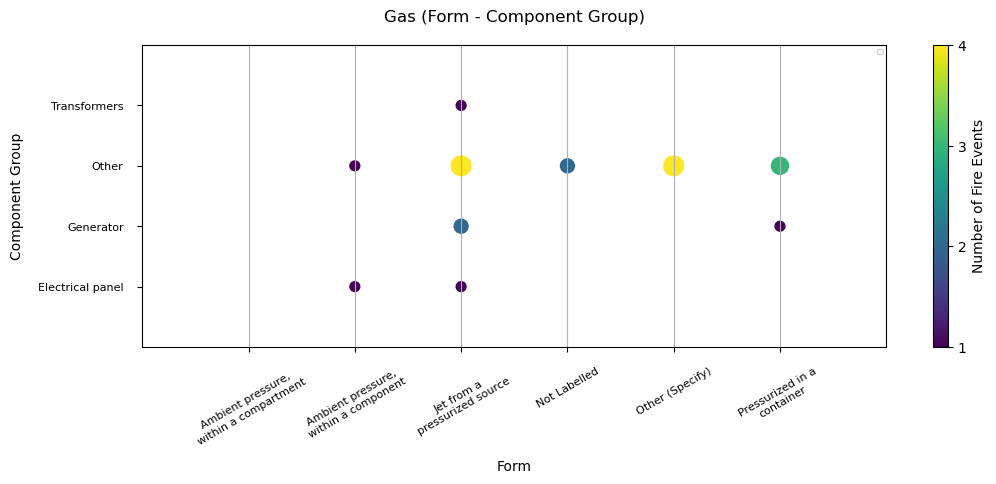

In [67]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']
df_em_gpft = gas_et[['Form', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(gas_et['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(gas_et['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(12, 4), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(format='%.0f', ticks = [1, 2, 3, 4])
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas (Form - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Gas (Form - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


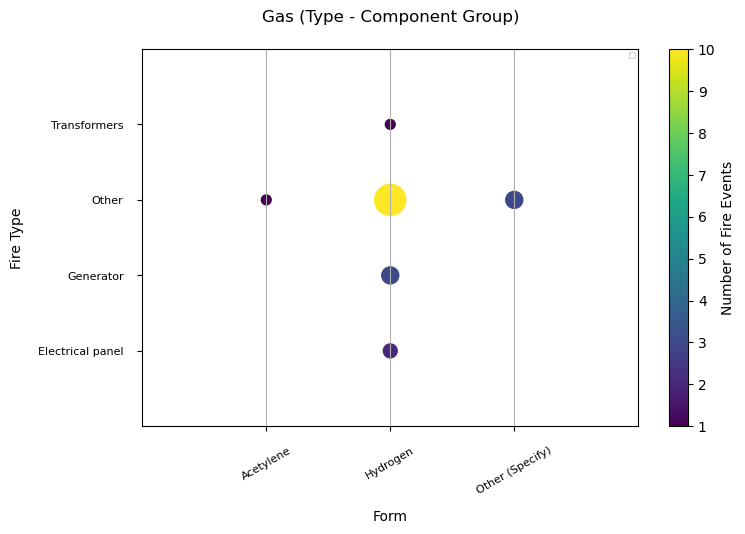

In [68]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']
df_em_gpft = gas_et[['Type', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(gas_et['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(gas_et['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas (Type - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Gas (Type  Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


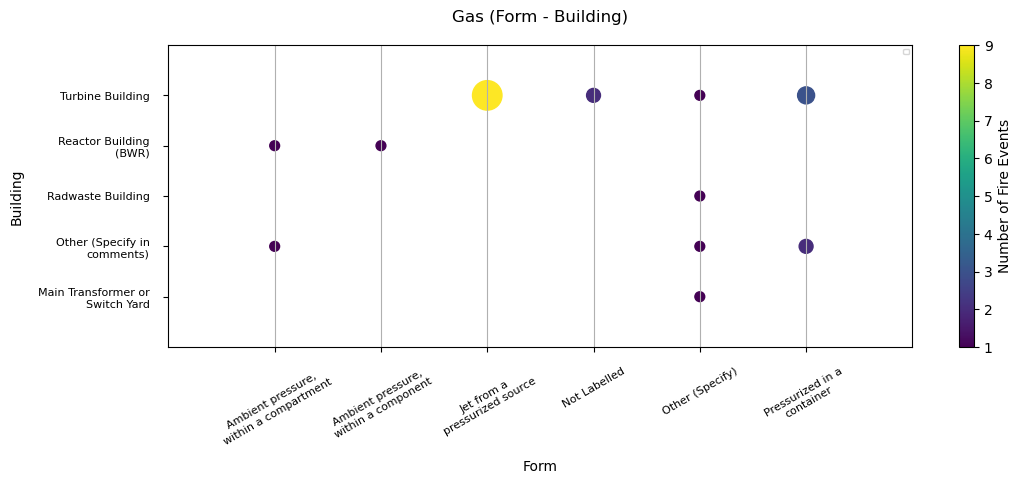

In [69]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']
df_em_gpft = gas_et[['Form', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(gas_et['Building'].dropna().unique().tolist())
yTickmarks = sorted(gas_et['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(12, 4), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(format='%.0f')
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas (Form - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Gas (Form - Building)', bbox_inches='tight')

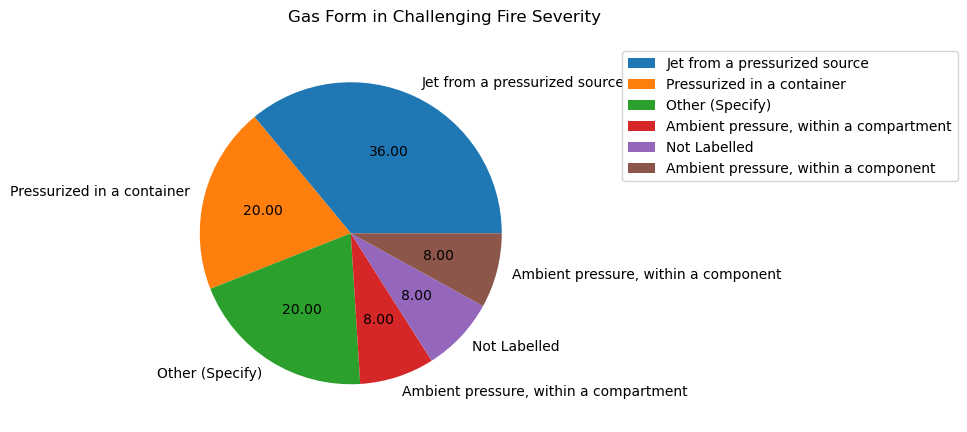

In [70]:
fig_gas = plt.figure(figsize=(5,5), dpi=100)
ax_gas = plt.subplot(111)
gas_et['Form'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_gas.suptitle('Gas Form in Challenging Fire Severity', fontsize=12, x = 0.7, y =0.95)
ax_gas.legend(bbox_to_anchor=(1.2, 1), fontsize = 10)
plt.show()
fig_gas.savefig(sys_up_dplo + "Gas Form pie.png", bbox_inches='tight')

In [71]:
liq_et.groupby(['Type'])['Form'].value_counts()

Type                        Form                                          
Cleaning solvents or paint  Contained within component                         1
                            Unconfined spill                                   1
Fuel Oil                    Leak - Oil soaked Insulation                       2
                            Contained within component                         1
                            Not Labelled                                       1
                            Other (Specify)                                    1
                            Unconfined spill                                   1
Lube Oil or Grease          Leak - Oil soaked Insulation                      26
                            Unconfined spill                                   8
                            Not Labelled                                       6
                            Contained within component                         5
                            Other 

In [72]:
liq_et['Combustible Group'].unique()

array(['Liquid'], dtype=object)

In [73]:
liq_tf_vc = pd.DataFrame(liq_et.groupby(['Form'])['Type'].value_counts())
liq_tf_vc['Percentage'] = 100 * liq_tf_vc['Type']  / 540
liq_tf_vc.Percentage = liq_tf_vc.Percentage.round(2)
liq_tf_vc

Type  \
Form                                           Type                               
Contained within component                     Lube Oil or Grease             5   
                                               Transformer Oil                3   
                                               Cleaning solvents or paint     1   
                                               Fuel Oil                       1   
Contained within reservoir                     Lube Oil or Grease             2   
                                               Other (Specify)                1   
                                               Transformer Oil                1   
Leak - Oil soaked Insulation                   Lube Oil or Grease            26   
                                               Fuel Oil                       2   
                                               Other (Specify)                2   
Not Labelled                                   Lube Oil or Grease             6   
                                               Transformer Oil                2   
                                               Fuel Oil                       1   
                                               Other (Specify)                1   
Other (Specify)                                Lube Oil or Grease             3   
                                               Fuel Oil                       1   
                                               Other (Specify)                1   
Spill confined by curbs or other physical feat Other (Specify)                2   
                                               Lube Oil or Grease             1   
                                               Transformer Oil                1   
Unconfined spill                               Transformer Oil               21   
                                               Lube Oil or Grease             8   
                                               Cleaning solvents or paint     1   
                                               Fuel Oil                       1   

                                                                           Percentage  
Form                                           Type                                    
Contained within component                     Lube Oil or Grease                0.93  
                                               Transformer Oil                   0.56  
                                               Cleaning solvents or paint        0.19  
                                               Fuel Oil                          0.19  
Contained within reservoir                     Lube Oil or Grease                0.37  
                                               Other (Specify)                   0.19  
                                               Transformer Oil                   0.19  
Leak - Oil soaked Insulation                   Lube Oil or Grease                4.81  
                                               Fuel Oil                          0.37  
                                               Other (Specify)                   0.37  
Not Labelled                                   Lube Oil or Grease                1.11  
                                               Transformer Oil                   0.37  
                                               Fuel Oil                          0.19  
                                               Other (Specify)                   0.19  
Other (Specify)                                Lube Oil or Grease                0.56  
                                               Fuel Oil                          0.19  
                                               Other (Specify)                   0.19  
Spill confined by curbs or other physical feat Other (Specify)                   0.37  
                                               Lube Oil or Grease                0.19  
                                               Transformer Oil      

In [74]:
from matplotlib.patches import Rectangle

In [75]:
liq_tf_vc = pd.DataFrame(liq_et.groupby(['Type'])['Form'].value_counts())
liq_tf_vc['Percentage'] = 100 * liq_tf_vc['Form']  / df_em_challenging['Type'].count().sum()
liq_tf_vc.Percentage = liq_tf_vc.Percentage.round(1)
liq_tf_vc

Form  \
Type                       Form                                                   
Cleaning solvents or paint Contained within component                         1   
                           Unconfined spill                                   1   
Fuel Oil                   Leak - Oil soaked Insulation                       2   
                           Contained within component                         1   
                           Not Labelled                                       1   
                           Other (Specify)                                    1   
                           Unconfined spill                                   1   
Lube Oil or Grease         Leak - Oil soaked Insulation                      26   
                           Unconfined spill                                   8   
                           Not Labelled                                       6   
                           Contained within component                         5   
                           Other (Specify)                                    3   
                           Contained within reservoir                         2   
                           Spill confined by curbs or other physical feat     1   
Other (Specify)            Leak - Oil soaked Insulation                       2   
                           Spill confined by curbs or other physical feat     2   
                           Contained within reservoir                         1   
                           Not Labelled                                       1   
                           Other (Specify)                                    1   
Transformer Oil            Unconfined spill                                  21   
                           Contained within component                         3   
                           Not Labelled                                       2   
                           Contained within reservoir                         1   
                           Spill confined by curbs or other physical feat     1   

                                                                           Percentage  
Type                       Form                                                        
Cleaning solvents or paint Contained within component                             0.2  
                           Unconfined spill                                       0.2  
Fuel Oil                   Leak - Oil soaked Insulation                           0.4  
                           Contained within component                             0.2  
                           Not Labelled                                           0.2  
                           Other (Specify)                                        0.2  
                           Unconfined spill                                       0.2  
Lube Oil or Grease         Leak - Oil soaked Insulation                           5.0  
                           Unconfined spill                                       1.5  
                           Not Labelled                                           1.2  
                           Contained within component                             1.0  
                           Other (Specify)                                        0.6  
                           Contained within reservoir                             0.4  
                           Spill confined by curbs or other physical feat         0.2  
Other (Specify)            Leak - Oil soaked Insulation                           0.4  
                           Spill confined by curbs or other physical feat         0.4  
                           Contained within reservoir                             0.2  
                           Not Labelled                                           0.2  
                           Other (Specify)                                        0.2  
Transformer Oil            Unconfined spill                         

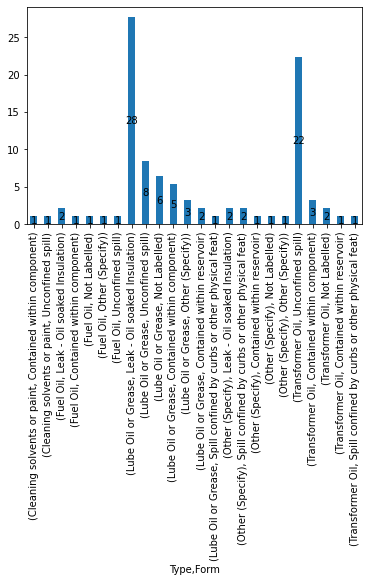

In [76]:
liq_tf_vc = pd.DataFrame(liq_et.groupby(['Type'])['Form'].value_counts())
liq_tf_vc['Percentage'] = 100 * liq_tf_vc['Form']  / liq_tf_vc['Form'].sum()
liq_tf_vc.Percentage = liq_tf_vc.Percentage.round(1)
ax_liq_tf = liq_tf_vc['Percentage'].plot(kind='bar', stacked = True)
for p in ax_liq_tf.get_children()[:-1]:  # skip the last patch as it is the background
    if isinstance(p, Rectangle):
        x, y = p.get_xy()
        w, h = p.get_width(), p.get_height()
        if h > 0:  # anything that have a height of 0 will not be annotated
            ax_liq_tf.text(x + 0.5 * w, y + 0.5 * h, '%0.0f'%h, va='center', ha='center')
# plt.savefig(sys_up_dplo + 'Combustible Groups-Fire Severity')
plt.show()

In [77]:
liq_tf_vc

Form  \
Type                       Form                                                   
Cleaning solvents or paint Contained within component                         1   
                           Unconfined spill                                   1   
Fuel Oil                   Leak - Oil soaked Insulation                       2   
                           Contained within component                         1   
                           Not Labelled                                       1   
                           Other (Specify)                                    1   
                           Unconfined spill                                   1   
Lube Oil or Grease         Leak - Oil soaked Insulation                      26   
                           Unconfined spill                                   8   
                           Not Labelled                                       6   
                           Contained within component                         5   
                           Other (Specify)                                    3   
                           Contained within reservoir                         2   
                           Spill confined by curbs or other physical feat     1   
Other (Specify)            Leak - Oil soaked Insulation                       2   
                           Spill confined by curbs or other physical feat     2   
                           Contained within reservoir                         1   
                           Not Labelled                                       1   
                           Other (Specify)                                    1   
Transformer Oil            Unconfined spill                                  21   
                           Contained within component                         3   
                           Not Labelled                                       2   
                           Contained within reservoir                         1   
                           Spill confined by curbs or other physical feat     1   

                                                                           Percentage  
Type                       Form                                                        
Cleaning solvents or paint Contained within component                             1.1  
                           Unconfined spill                                       1.1  
Fuel Oil                   Leak - Oil soaked Insulation                           2.1  
                           Contained within component                             1.1  
                           Not Labelled                                           1.1  
                           Other (Specify)                                        1.1  
                           Unconfined spill                                       1.1  
Lube Oil or Grease         Leak - Oil soaked Insulation                          27.7  
                           Unconfined spill                                       8.5  
                           Not Labelled                                           6.4  
                           Contained within component                             5.3  
                           Other (Specify)                                        3.2  
                           Contained within reservoir                             2.1  
                           Spill confined by curbs or other physical feat         1.1  
Other (Specify)            Leak - Oil soaked Insulation                           2.1  
                           Spill confined by curbs or other physical feat         2.1  
                           Contained within reservoir                             1.1  
                           Not Labelled                                           1.1  
                           Other (Specify)                                        1.1  
Transformer Oil            Unconfined spill                         

In [78]:
pd.DataFrame(liq_et.groupby(['Type', 'Building', 'Component Group'])['Form'].value_counts())

Form
Type                       Building                                      Component Group  Form                                                
Cleaning solvents or paint Diesel Generator Building                     Generator        Contained within component                         1
                           Turbine Building                              Other            Unconfined spill                                   1
Fuel Oil                   Diesel Generator Building                     Generator        Leak - Oil soaked Insulation                       2
                                                                                          Other (Specify)                                    1
                                                                                          Unconfined spill                                   1
                                                                         Other            Not Labelled                                       1
Lube Oil or Grease         Auxiliary Building (PWR)                      Electric Motor   Contained within component                         1
                           Circulating Water Pump house/Intake Structure Pumps            Not Labelled                                       1
                                                                                          Other (Specify)                                    1
                           Containment (PWR)                             Other            Leak - Oil soaked Insulation                       1
                                                                         Pumps            Leak - Oil soaked Insulation                       2
                           Diesel Generator Building                     Generator        Leak - Oil soaked Insulation                       9
                                                                                          Other (Specify)                                    2
                                                                                          Not Labelled                                       1
                                                                                          Spill confined by curbs or other physical feat     1
                           Main Transformer or Switch Yard               Transformers     Leak - Oil soaked Insulation                       1
                           Other (Specify in comments)                   Boilers          Unconfined spill                                   1
                                                                         Other            Unconfined spill                                   1
                                                                         Pumps            Contained within component                         1
                                                                                          Unconfined spill                                   1
                           Reactor Building (BWR)                        Pumps            Contained within reservoir                         1
                                                                                          Leak - Oil soaked Insulation                       1
                           Service Water Pump house                      Pumps            Leak - Oil soaked Insulation                       1
                           Turbine Building                              Air Compressors  Contained within component                         1
                                                                         Electric Motor   Not Labelled                                       1
                                                                         Generator        Leak - Oil soaked Insulation                       7
                                                                                          Not Labelled                                

In [79]:
liq_tf_vc['Percentage'].sum()

100.30000000000001

In [80]:
df_em_challenging['Combustible Group'].count().sum()

529

In [81]:
ins_tf_vc = pd.DataFrame(ins_et.groupby(['Type'])['Form'].value_counts())
ins_tf_vc['Percentage'] = (100 * ins_tf_vc['Form']  / df_em_challenging['Type'].count().sum()).round(1)
ins_tf_vc.to_excel(sys_up_data + 'ins_types_forms.xlsx')
ins_tf_vc

Form  Percentage
Type               Form                                                   
Mixed              Other (Specify)                           3         0.6
                   Single Cable                              2         0.4
Not Labelled       Type not specified                        4         0.8
Thermoset          Single Cable                              2         0.4
Type not specified Single Cable                              9         1.7
                   Multiple Cables Not In Tray or Bundle     5         1.0
                   Unknown                                   4         0.8
                   Other (Specify)                           3         0.6
                   Single Cable Tray                         3         0.6
                   Not Labelled                              1         0.2

In [82]:
ins_tf_vc['Percentage'].sum()

7.1

In [83]:
gas_tf_vc = pd.DataFrame(gas_et.groupby(['Type'])['Form'].value_counts())
gas_tf_vc['Percentage'] = (100 * gas_tf_vc['Form']  / df_em_challenging['Type'].count().sum()).round(1)
gas_tf_vc.to_excel(sys_up_data + 'gas_type_form.xlsx')
gas_tf_vc

Form  Percentage
Type            Form                                                    
Acetylene       Not Labelled                               1         0.2
Hydrogen        Jet from a pressurized source              9         1.7
                Pressurized in a container                 4         0.8
                Other (Specify)                            3         0.6
                Ambient pressure, within a compartment     2         0.4
                Ambient pressure, within a component       2         0.4
                Not Labelled                               1         0.2
Other (Specify) Other (Specify)                            2         0.4
                Pressurized in a container                 1         0.2

In [84]:
gas_tf_vc['Percentage'].sum()

4.9

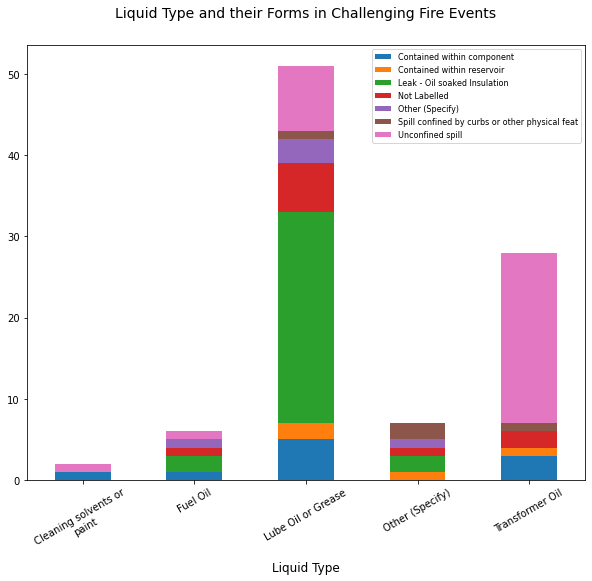

In [85]:
lqtf       = liq_et.groupby(['Type'])['Form'].value_counts()
ax_lqtf    = lqtf.unstack().plot(kind='bar', stacked = True, figsize = (10,8))
xTickmarks = sorted(liq_et['Type'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_lqtf.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_lqtf.set_xlabel('Liquid Type', fontsize = 12)
ax_lqtf.legend(prop={'size':8}, ncol=1)
ax_lqtf.set_title('Liquid Type and their Forms in Challenging Fire Events', fontsize = 14, x=0.5, y = 1.05)
plt.savefig(sys_up_dplo + 'Liquid Type - Form Challenging Fire Events')
plt.show()